<a href="https://colab.research.google.com/github/dolmarawat/NLP-332-Final-Project/blob/main/FinalVersion_of_AI_JobsReddit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **IST 332: natural Language Processing**
# **Final Project: Analyzing AI-Related Job Anxiety and Future Optimism on Reddit**

## **Github Link to access Reports and Code Notebook: https://github.com/dolmarawat/NLP-332-Final-Project**

# **Task 1: Create Corpus**


## **Import NLTK libraries**

In [ ]:
!pip install nltk spacy emoji
!python -m spacy download en_core_web_sm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 608.4/608.4 kB 19.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 63.9 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


## **Importing word lemmatizer for creating POS tag types**

In [ ]:
import nltk
from string import punctuation
nltk.download('stopwords')
nltk.download('punkt')

from nltk.corpus import stopwords
import re
def preprocessing(tokens):
  tokens = [token.lower() for token in tokens] # lowercasing

  tokens = [token for token in tokens if not token.isdigit()] # remove digit - isdigit is a python buit-in method.

  tokens = [token for token in tokens if token not in punctuation] # remove punctuations

  # Remove tokens that are entirely punctuation (single or multiple)
  tokens = [token for token in tokens if not re.fullmatch(r"[^\w]+", token)]

  mystopwords = set(stopwords.words("english")) # use english stopwords list.
  tokens = [token for token in tokens if token not in mystopwords] # remove stopwords

  tokens = [token for token in tokens if len(token)>=3] # remove tokens with one or two characters

  return tokens

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
from nltk.stem import SnowballStemmer

snow_stemmer = SnowballStemmer(language='english')  # set the language the parameter
#stem each word in the token list of each review
def snowball_Stemmer(token_col):
  """ stem each word in the specfical col """
  snowball_words = []
  for w in token_col:
    x = snow_stemmer.stem(w)
    snowball_words.append(x)
  return snowball_words

## **Mounting drive and dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/Drive',  force_remount=True)

Mounted at /content/Drive


In [ ]:
import pandas as pd
df = pd.read_csv('/content/Drive/MyDrive/IST332AIReddit/reddit_reviews_10k_FINAL.csv')
df.head()

,text,label,type
0,I GOT THE JOB!! F*** MY OLD MANAGER!!! I’ve ha...,CAREER_ANXIETY,post
1,congrats! just a word of caution not to tell t...,CAREER_ANXIETY,comment
2,Congrats on the pay raise! Did you study anyth...,CAREER_ANXIETY,comment
3,update to us how you break the news to your ma...,CAREER_ANXIETY,comment
4,Congrats. You can do the bare minimum now and ...,CAREER_ANXIETY,comment


## **Inspecting data**

In [ ]:
# Inspect
print(df.shape)
print(df.columns.tolist())
df.head(3)

(10000, 3)
['text', 'label', 'type']


,text,label,type
0,I GOT THE JOB!! F*** MY OLD MANAGER!!! I’ve ha...,CAREER_ANXIETY,post
1,congrats! just a word of caution not to tell t...,CAREER_ANXIETY,comment
2,Congrats on the pay raise! Did you study anyth...,CAREER_ANXIETY,comment


# **Task 2: Text Preprocessing**

Expanded contractions “don’t” → “do not” This helps models understand negation clearly.
Tokenize Split into individual words.
Normalize lowercase remove digits remove punctuation remove stopwords keep words with ≥3 characters
Applied Stemming A rough vocabulary reduction.
Applied Lemmatization A precise vocabulary reduction.
Create a fully cleaned text column For downstream modeling.

In [ ]:
!pip install contractions
import contractions

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.1/345.1 kB 21.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 11.7 MB/s eta 0:00:00


In [ ]:
import nltk
from string import punctuation
from nltk.corpus import stopwords
import re

def preprocessing(tokens):
  tokens = [token.lower() for token in tokens] # lowercasing
  tokens = [token for token in tokens if not token.isdigit()] # remove digit - isdigit is a python buit-in method.
  tokens = [token for token in tokens if token not in punctuation] # remove punctuations
  # Remove tokens that are entirely punctuation (single or multiple)
  tokens = [token for token in tokens if not re.fullmatch(r"[^\w]+", token)]
  mystopwords = set(stopwords.words("english")) # use english stopwords list.
  tokens = [token for token in tokens if token not in mystopwords] # remove stopwords
  tokens = [token for token in tokens if len(token)>=3] # remove tokens with one or two characters
  return tokens

In [ ]:
df['Review_Expanded'] = df['text']


In [ ]:
from nltk.tokenize import wordpunct_tokenize

# Get a sample expanded text from the DataFrame for demonstration
expanded_text_sample = df['Review_Expanded'].iloc[0]

# tokenization
tokens = wordpunct_tokenize(expanded_text_sample)

# run basic preprocessing
pre_proc_text = preprocessing(tokens)

print("Original expanded text sample:", expanded_text_sample)
print("Preprocessed text:", pre_proc_text)
print("Length of preprocessed text:", len(pre_proc_text))

Original expanded text sample: I GOT THE JOB!! F*** MY OLD MANAGER!!! I’ve had to deal with an extremely toxic manager for months now who has used personal insults, made me work weekends, and put me on zombie projects, and I studied my ASS off just for interviews to finally get a job offer today for a role at a Big Tech job way more in line with what I actually want to do. F*** my old team, for so long I held back because I didn’t want to burn bridges but I could NOT care less anymore
Preprocessed text: ['got', 'job', 'old', 'manager', 'deal', 'extremely', 'toxic', 'manager', 'months', 'used', 'personal', 'insults', 'made', 'work', 'weekends', 'put', 'zombie', 'projects', 'studied', 'ass', 'interviews', 'finally', 'get', 'job', 'offer', 'today', 'role', 'big', 'tech', 'job', 'way', 'line', 'actually', 'want', 'old', 'team', 'long', 'held', 'back', 'want', 'burn', 'bridges', 'could', 'care', 'less', 'anymore']
Length of preprocessed text: 46


In [ ]:
df.columns

Index(['text', 'label', 'type', 'Review_Expanded'], dtype='object')

In [ ]:
print(df.columns.tolist())

['text', 'label', 'type', 'Review_Expanded']


In [ ]:
# Preprocess the first 10 reviews
preprocessed_reviews = []
for i in range(0, 10):  # Iterate through the first 10 rows (index 0 to 9)
    # Get the already expanded text from the DataFrame
    expanded_text = df['Review_Expanded'].iloc[i]
    # Tokenize and preprocess the expanded text
    tokens = wordpunct_tokenize(expanded_text)
    preprocessed_tokens = preprocessing(tokens)
    preprocessed_reviews.append(preprocessed_tokens)

# Display the preprocessed reviews
for i, review_tokens in enumerate(preprocessed_reviews):
    print(f"Review {i+1}: {review_tokens}\n")

Review 1: ['got', 'job', 'old', 'manager', 'deal', 'extremely', 'toxic', 'manager', 'months', 'used', 'personal', 'insults', 'made', 'work', 'weekends', 'put', 'zombie', 'projects', 'studied', 'ass', 'interviews', 'finally', 'get', 'job', 'offer', 'today', 'role', 'big', 'tech', 'job', 'way', 'line', 'actually', 'want', 'old', 'team', 'long', 'held', 'back', 'want', 'burn', 'bridges', 'could', 'care', 'less', 'anymore']

Review 2: ['congrats', 'word', 'caution', 'tell', 'manager', 'anyone', 'team', 'going', 'want', 'burn', 'bridges', 'could', 'easily', 'reach', 'ruin', 'job', 'offer']

Review 3: ['congrats', 'pay', 'raise', 'study', 'anything', 'system', 'design', 'leetcode']

Review 4: ['update', 'break', 'news', 'manager']

Review 5: ['congrats', 'bare', 'minimum', 'fully', 'cut', 'start', 'new', 'gig']

Review 6: ['hoping', 'thrive', 'one', 'positive', 'people', 'around']

Review 7: ['congratulations', 'left', 'incredibly', 'toxic', 'manager', 'got', 'raise', 'faang', 'level', 'movi

In [ ]:
import nltk, contractions
from nltk import word_tokenize
nltk.download('punkt', quiet=True)
nltk.download('punkt_tab', quiet=True) # Added to download the missing resource

df["raw_tokens"] = df["text"].fillna("").apply(
    lambda t: word_tokenize(contractions.fix(t))
)

In [ ]:
import re, string
from nltk.corpus import stopwords
nltk.download('stopwords', quiet=True)

stop = set(stopwords.words("english"))
extra_stop = {"sep"}  # month slipped in from dates; add more if you want
stop |= extra_stop

def normalize(tokens):
    out = []
    for w in tokens:
        w = (w or "").lower()
        w = (w.replace("’","'").replace("“",'"').replace("”",'"').replace("…","..."))
        w = w.strip(string.punctuation)       # remove leading/trailing punct
        if not w or len(w) < 2:    # drop empties and 1-char tokens
            continue
        if w in stop:              # drop stopwords (and 'sep')
            continue
        if re.search(r"\d", w):    # drop tokens containing digits
            continue
        # drop tokens that are still all punctuation-like
        if all(ch in string.punctuation for ch in w):
            continue
        out.append(w)
    return out

df["clean_tokens"] = df["raw_tokens"].apply(normalize)

In [ ]:
from nltk import FreqDist
corpus_clean = [w for review in df["clean_tokens"] for w in review]
fdist = FreqDist(corpus_clean)

print("Top 10 tokens (normalized):")
for tok, cnt in fdist.most_common(25):
    print(tok, cnt)

Top 10 tokens (normalized):
like 2032
ai 2028
people 1797
get 1647
job 1592
would 1586
work 1376
time 1204
one 1125
years 1117
even 1012
going 989
company 925
know 906
good 894
make 874
think 855
need 780
much 776
got 768
still 763
companies 761
jobs 747
also 703
new 689


In [ ]:
df['Review_Expanded'] = df['text'].apply(lambda x:contractions.fix(x).lower())
df[["text", "Review_Expanded"]].head(10)

,text,Review_Expanded
0,I GOT THE JOB!! F*** MY OLD MANAGER!!! I’ve ha...,i got the job!! f*** my old manager!!! i have ...
1,congrats! just a word of caution not to tell t...,congrats! just a word of caution not to tell t...
2,Congrats on the pay raise! Did you study anyth...,congrats on the pay raise! did you study anyth...
3,update to us how you break the news to your ma...,update to us how you break the news to your ma...
4,Congrats. You can do the bare minimum now and ...,congrats. you can do the bare minimum now and ...
5,Hoping you thrive at this one and have positiv...,hoping you thrive at this one and have positiv...
6,Congratulations! I just left an incredibly tox...,congratulations! i just left an incredibly tox...
7,You need to learn to deal with toxic managers....,you need to learn to deal with toxic managers....
8,Leaving and never seeing a toxic manager again...,leaving and never seeing a toxic manager again...
9,Congrats man! That’s awesome to hear. Sounds l...,congrats man! that is awesome to hear. sounds ...


In [ ]:
df.describe()

,text,label,type,Review_Expanded,raw_tokens,clean_tokens
count,10000,10000,10000,10000,10000,10000
unique,9987,2,2,9987,9987,9887
top,![gif](giphy|XvjC06Gh9lhfZNBNIM),CAREER_ANXIETY,comment,![gif](giphy|xvjc06gh9lhfznbnim),"[!, [, gif, ], (, giphy|XvjC06Gh9lhfZNBNIM, )]",[gif]
freq,3,5500,9817,3,3,41


In [ ]:
import spacy
nlp = spacy.load("en_core_web_sm", disable=["parser", "ner"])

In [ ]:
%%time
df['Review_Tokens'] = df['Review_Expanded'].apply(lambda review:[token.text for token in nlp(review)])

CPU times: user 58.3 s, sys: 264 ms, total: 58.6 s
Wall time: 1min 12s


In [ ]:
texts = df["Review_Expanded"].astype(str).tolist()

In [ ]:
df[['text', 'Review_Expanded', "Review_Tokens"]].head(10)

,text,Review_Expanded,Review_Tokens
0,I GOT THE JOB!! F*** MY OLD MANAGER!!! I’ve ha...,i got the job!! f*** my old manager!!! i have ...,"[i, got, the, job, !, !, f, *, *, *, my, old, ..."
1,congrats! just a word of caution not to tell t...,congrats! just a word of caution not to tell t...,"[congrats, !, just, a, word, of, caution, not,..."
2,Congrats on the pay raise! Did you study anyth...,congrats on the pay raise! did you study anyth...,"[congrats, on, the, pay, raise, !, did, you, s..."
3,update to us how you break the news to your ma...,update to us how you break the news to your ma...,"[update, to, us, how, you, break, the, news, t..."
4,Congrats. You can do the bare minimum now and ...,congrats. you can do the bare minimum now and ...,"[congrats, ., you, can, do, the, bare, minimum..."
5,Hoping you thrive at this one and have positiv...,hoping you thrive at this one and have positiv...,"[hoping, you, thrive, at, this, one, and, have..."
6,Congratulations! I just left an incredibly tox...,congratulations! i just left an incredibly tox...,"[congratulations, !, i, just, left, an, incred..."
7,You need to learn to deal with toxic managers....,you need to learn to deal with toxic managers....,"[you, need, to, learn, to, deal, with, toxic, ..."
8,Leaving and never seeing a toxic manager again...,leaving and never seeing a toxic manager again...,"[leaving, and, never, seeing, a, toxic, manage..."
9,Congrats man! That’s awesome to hear. Sounds l...,congrats man! that is awesome to hear. sounds ...,"[congrats, man, !, that, is, awesome, to, hear..."


## **Normalisation with Stemmer**

In [ ]:
from nltk.stem import SnowballStemmer

snow_stemmer = SnowballStemmer(language='english')  # set the language the parameter
#stem each word in the token list of each review
def snowball_Stemmer(token_col):
  """ stem each word in the specfical col """
  snowball_words = []
  for w in token_col:
    x = snow_stemmer.stem(w)
    snowball_words.append(x)
  return snowball_words

In [ ]:
%%time
df['Review_Stemmed'] = df['Review_Tokens'].apply(snowball_Stemmer)

CPU times: user 5.02 s, sys: 13.8 ms, total: 5.04 s
Wall time: 5.12 s


In [ ]:
df['Review_Stemmed'].head(10)

,Review_Stemmed
0,"[i, got, the, job, !, !, f, *, *, *, my, old, ..."
1,"[congrat, !, just, a, word, of, caution, not, ..."
2,"[congrat, on, the, pay, rais, !, did, you, stu..."
3,"[updat, to, us, how, you, break, the, news, to..."
4,"[congrat, ., you, can, do, the, bare, minimum,..."
5,"[hope, you, thrive, at, this, one, and, have, ..."
6,"[congratul, !, i, just, left, an, incred, toxi..."
7,"[you, need, to, learn, to, deal, with, toxic, ..."
8,"[leav, and, never, see, a, toxic, manag, again..."
9,"[congrat, man, !, that, is, awesom, to, hear, ..."


## **Normalisation through Lemmas**

In [ ]:
# Function to return just lemmas from text
# spacy carry the string than tokens
def spacy_lemmatizer(text):
  doc = nlp(text)
  return [token.lemma_ for token in doc if not token.is_space]

In [ ]:
 #Apply spacy lemmtization
%%time
df['Review_Lemma'] = df['Review_Expanded'].apply(spacy_lemmatizer)
df['Review_Lemma'].head(3)

CPU times: user 46.7 s, sys: 303 ms, total: 47 s
Wall time: 47.3 s


,Review_Lemma
0,"[I, get, the, job, !, !, f, *, *, *, my, old, ..."
1,"[congrat, !, just, a, word, of, caution, not, ..."
2,"[congrat, on, the, pay, raise, !, do, you, stu..."


In [ ]:
df['Review_Lemma_Final'] = df['Review_Lemma'].apply(preprocessing)
df['Review_Cleaned'] = df['Review_Lemma_Final'].apply(lambda row: " ".join(str(x) for x in row))
df['Review_Cleaned'].head()

,Review_Cleaned
0,get job old manager deal extremely toxic manag...
1,congrat word caution tell manager anyone team ...
2,congrat pay raise study anything system design...
3,update break news manager
4,congrat bare minimum fully cut start new gig


In [ ]:
#data cleaning for unnecessary jargon on reddit comments

import re

def clean_reddit(text):
    text = re.sub(r'http\S+', ' ', text)                 # remove URLs
    text = re.sub(r'www\.\S+', ' ', text)                # remove URLs
    text = re.sub(r'amp', ' ', text)                     # remove "amp"
    text = re.sub(r'reddit\S*', ' ', text)               # remove reddit artifacts
    text = re.sub(r'webp\S*', ' ', text)                 # remove image formats
    text = re.sub(r'png|jpg|jpeg|gif', ' ', text)        # remove image file types
    text = re.sub(r'\s+', ' ', text)                     # normalize spaces
    return text.strip()


df["Review_Cleaned"] = df["Review_Cleaned"].apply(clean_reddit)


In [ ]:
print("Shape of the DataFrame before removing rows with empty lemma lists:", df.shape)

# Remove rows where 'Review_Lemma_Final' is an empty list
df_cleaned = df[df['Review_Lemma_Final'].apply(lambda x: len(x) > 0)].copy()

print("Shape of the DataFrame after removing rows with empty lemma lists:", df_cleaned.shape)

Shape of the DataFrame before removing rows with empty lemma lists: (10000, 11)
Shape of the DataFrame after removing rows with empty lemma lists: (10000, 11)


In [ ]:
# Display the first few rows of the cleaned reviews
print("First 5 cleaned reviews:")
display(df_cleaned['Review_Cleaned'].head())

First 5 cleaned reviews:


,Review_Cleaned
0,get job old manager deal extremely toxic manag...
1,congrat word caution tell manager anyone team ...
2,congrat pay raise study anything system design...
3,update break news manager
4,congrat bare minimum fully cut start new gig


In [ ]:
df_cleaned['Review_Length'] = df_cleaned['Review_Cleaned'].apply(lambda x: len(x.split()))

print("Descriptive statistics for token lengths:")
print(df_cleaned['Review_Length'].describe())

print("\nFirst 5 cleaned reviews with their lengths:")
display(df_cleaned[['Review_Cleaned', 'Review_Length']].head(20))

Descriptive statistics for token lengths:
count    10000.00000
mean        22.15770
std         30.61643
min          0.00000
25%          7.00000
50%         12.00000
75%         25.00000
max        595.00000
Name: Review_Length, dtype: float64

First 5 cleaned reviews with their lengths:


,Review_Cleaned,Review_Length
0,get job old manager deal extremely toxic manag...,46
1,congrat word caution tell manager anyone team ...,16
2,congrat pay raise study anything system design...,8
3,update break news manager,4
4,congrat bare minimum fully cut start new gig,8
5,hop thrive one positive people around,6
6,congratulation leave incredibly toxic manager ...,13
7,need learn deal toxic manager need work weeken...,9
8,leave never see toxic manager one liberating f...,8
9,congrat man awesome hear sound like deserve wo...,66


In [ ]:
import nltk
from nltk.probability import FreqDist

# Ensure 'all_words' is available (if not, it would need to be re-run from previous steps)
# For safety, re-create all_words from df_cleaned['Review_Cleaned']
all_words = ' '.join(df_cleaned['Review_Cleaned']).split()

fdist = FreqDist(all_words)
fdist.most_common(25)

[('get', 3106),
 ('job', 2359),
 ('work', 2107),
 ('like', 2086),
 ('people', 1812),
 ('year', 1702),
 ('company', 1695),
 ('make', 1597),
 ('would', 1588),
 ('time', 1431),
 ('one', 1246),
 ('good', 1240),
 ('know', 1164),
 ('think', 1147),
 ('use', 1122),
 ('well', 1119),
 ('thing', 1101),
 ('need', 1064),
 ('say', 1025),
 ('even', 1012),
 ('want', 923),
 ('take', 915),
 ('see', 913),
 ('look', 864),
 ('pay', 791)]

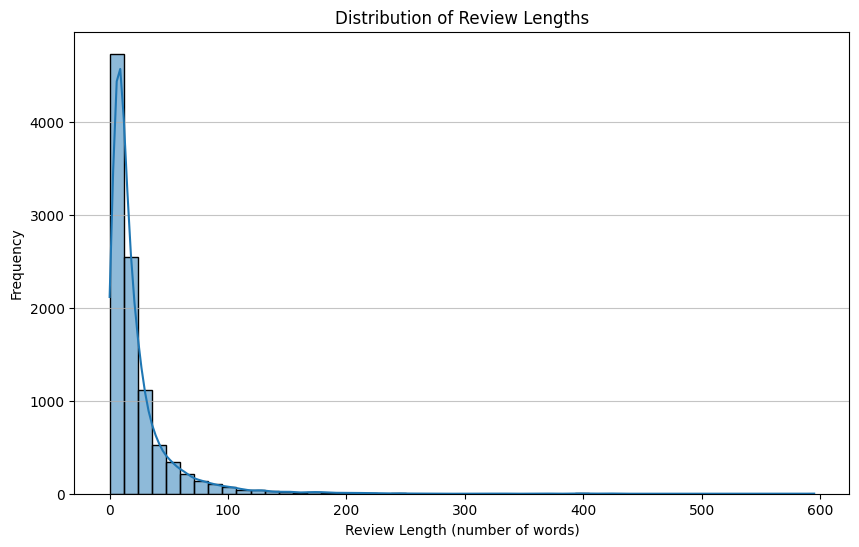

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['Review_Length'], bins=50, kde=True)
plt.title('Distribution of Review Lengths')
plt.xlabel('Review Length (number of words)')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

#**Task 3: Data Understanding**

##**Finding and exploring context of words**

In [ ]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [ ]:
from nltk.text import Text

# 'corpus_clean' was already created in a previous step (cell 08X3X6XyIrUS)
# It contains tokens processed with a less restrictive length filter, thus retaining 'ai'.
reviews_text_nltk = Text(corpus_clean)

# What does AI often occur with?
reviews_text_nltk.concordance('ai')

Displaying 25 of 2028 matches:
ing indeed grown tiresome given state ai bubble say sorry guys usa except even
g developers hiring discount thinking ai insanity would stopped market crash a
i insanity would stopped market crash ai race china continue oracle fired joke
hinese us government full bailout big ai players fear software engineering goi
ory everyone picked wrong major india ai need organized labor movement stop ge
drop bucket people still hiring crazy ai related stuff happened biggest payche
teresting see far companies push idea ai efficiency gains enable lower enginee
 quick note anyone new blame anything ai offshoring people think absolute moro
ads vibe code way college avoid using ai assistance much possible hard avoid c
e salary including devs also increase ai software jobs becoming scarce jr role
even networking taking big hit wonder ai impacted graduating numbers go back c
ople find cut people able game system ai also many probably find human llm mak
domain question job e

In [ ]:
# What words appear with scared in similar context?
reviews_text_nltk.similar('scared')

people dream place would help point always likely figure clueless try
curious force cringe trillionaire terrifying falsifiable


In [ ]:
# common_contexts examines the contexts shared by two or more words.
reviews_text_nltk.common_contexts(['ai', 'scared'])

No common contexts were found


In [ ]:
# common_contexts examines the contexts shared by two or more words.
reviews_text_nltk.common_contexts(['ai', 'job'])

ai_ai even_really use_search


In [ ]:
from nltk.text import Text

# flatten raw tokens and lower-case
all_raw_lower = [w.lower() for review in df["raw_tokens"] for w in review]

text_obj = Text(all_raw_lower)

In [ ]:
print("Words appearing in contexts similar to 'scared':")
text_obj.similar("scared", num=20)

Words appearing in contexts similar to 'scared':
hard good doing applying willing fun used going out how trying time
there able done kind lucky tired valuable expected


##**Exploratory data analysis**

### - Conduct exploratory data analysis to understand your text distribution, label
### balance, and content quality.


###Firstly, we'll be calculating Lexical Diversity

In [ ]:
# Return total number of tokens in a text object
print(len(texts))
# Recall set items do not allow dupliates. Hence, below code returns the total number of unique tokens
print(len(set(texts)))

10000
9987


In [ ]:
#Lexical diversity is the total number of tokens over unique tokens
def lexical_diversity(text):
    """
    A measure of the lexical richness of the text
    """
    return len(text)/len(set(text))

In [ ]:
# percentage of a word in a text
def percentage(word_count, total):
    """
    Compute what percentage of the text is taken up by a specific word
    """
    return 100* word_count/total

In [ ]:
# calculate lexical diversity of cleaned corpus
print("Lexical diversity of cleaned corpus:", lexical_diversity(corpus_clean))
# calculate percentage of 'scared' in the cleaned corpus
# Ensure 'scared' is lowercased to match corpus_clean tokens
scared_count = corpus_clean.count('scared')
total_words = len(corpus_clean)
print("Percentage of 'scared' in cleaned corpus:", percentage(scared_count, total_words))

Lexical diversity of cleaned corpus: 11.895519262981574
Percentage of 'scared' in cleaned corpus: 0.012761163818140214


In [ ]:
import nltk, contractions, re, string
from nltk.corpus import stopwords
from nltk import word_tokenize

stop = set(stopwords.words("english"))

def normalize(tokens):
    cleaned = []
    for w in tokens:
        wl = w.lower().strip(string.punctuation)
        if not wl or len(wl) < 2:
            continue
        if wl in stop:
            continue
        if re.search(r"\d", wl):
            continue
        cleaned.append(wl)
    return cleaned

df["raw_tokens"] = df["text"].fillna("").apply(
    lambda t: word_tokenize(contractions.fix(t))
)
df["clean_tokens"] = df["raw_tokens"].apply(normalize)

In [ ]:
def lexical_diversity(tokens):
    return (len(set(tokens)) / len(tokens)) if tokens else 0

rows = []
for i in range(min(10, len(df))):
    raw_len   = len(df.loc[i, "raw_tokens"])
    clean_len = len(df.loc[i, "clean_tokens"])
    lexdiv    = round(lexical_diversity(df.loc[i, "clean_tokens"]), 4)
    rows.append([i+1, raw_len, clean_len, lexdiv])

import pandas as pd
table_df = pd.DataFrame(rows, columns=[
    "Review",
    "Review Length (# of tokens from raw text)",
    "Cleaned Review Length (# of tokens after normalization)",
    "Lexical Diversity"
])
table_df

,Review,Review Length (# of tokens from raw text),Cleaned Review Length (# of tokens after normalization),Lexical Diversity
0,1,112,46,0.8913
1,2,40,17,1.0000
2,3,17,8,1.0000
3,4,11,5,1.0000
4,5,20,8,1.0000
5,6,12,6,1.0000
6,7,32,14,1.0000
7,8,21,9,0.8889
8,9,16,8,1.0000
9,10,160,65,0.8769


In [ ]:
def lexical_diversity(tokens):
    return (len(set(tokens)) / len(tokens)) if tokens else 0

rows = []
for i in range(min(10, len(df))):
    raw_len   = len(df.loc[i, "raw_tokens"])
    clean_len = len(df.loc[i, "clean_tokens"])
    lexdiv    = round(lexical_diversity(df.loc[i, "clean_tokens"]), 4)
    rows.append([i+1, raw_len, clean_len, lexdiv])

import pandas as pd
table_df = pd.DataFrame(rows, columns=[
    "Review",
    "Review Length (# of tokens from raw text)",
    "Cleaned Review Length (# of tokens after normalization)",
    "Lexical Diversity"
])
table_df


,Review,Review Length (# of tokens from raw text),Cleaned Review Length (# of tokens after normalization),Lexical Diversity
0,1,112,46,0.8913
1,2,40,17,1.0000
2,3,17,8,1.0000
3,4,11,5,1.0000
4,5,20,8,1.0000
5,6,12,6,1.0000
6,7,32,14,1.0000
7,8,21,9,0.8889
8,9,16,8,1.0000
9,10,160,65,0.8769


##**Plot frequency distribuition**

In [ ]:
from nltk import FreqDist

In [ ]:
def preprocessing(tokens):
    tokens = [token.lower() for token in tokens] # lowercasing
    tokens = [token for token in tokens if not token.isdigit()] # remove digit - isdigit is a python buit-in method.
    tokens = [token for token in tokens if token not in punctuation] # remove punctuations
    mystopwords = set(stopwords.words("english")) # use english stopwords list.
    tokens = [token for token in tokens if token not in mystopwords] # remove stopwords
    tokens = [token for token in tokens if len(token)>=3] # remove tokens with one or two characters
    return tokens

In [ ]:
# Clean the raw text
all_reviews_text = ' '.join(df_cleaned['Review_Cleaned']) # Join the list of review strings into a single string
tokens = wordpunct_tokenize(all_reviews_text)
# Run basic preprocessing
reviews_cleaned = preprocessing (tokens)
len(reviews_cleaned)

220401

In [ ]:
# Use FreqDis() to find the frequency disctibution for each token
fdist_reviews= FreqDist(reviews_cleaned)
# Check fdist1, which is a dictionary data type that has key:value pairs
fdist_reviews

FreqDist({'get': 3106, 'job': 2361, 'work': 2110, 'like': 2086, 'people': 1812, 'year': 1706, 'company': 1697, 'make': 1598, 'would': 1588, 'time': 1432, ...})

In [ ]:
# count the total number of tokens in a corpus, which is the same as len()
fdist_reviews.N()

220401

In [ ]:
#Count number of 'scared' appears
fdist_reviews['scared']

27

In [ ]:
# determine relevant frequency of a token in a corpus
# this is very important because we also will remove low frequency tokens (e.g., these less than 0.001)
fdist_reviews.freq('scared')

0.00012250398137939484

In [ ]:
#Create a list of vocabulary that includes all the keys or unique tokens in the text
vocabulary_reviews = list(fdist_reviews.keys())
# Show the 20 most frequent words
vocabulary_reviews[:30]

['get',
 'job',
 'old',
 'manager',
 'deal',
 'extremely',
 'toxic',
 'month',
 'use',
 'personal',
 'insult',
 'make',
 'work',
 'weekend',
 'put',
 'zombie',
 'project',
 'study',
 'ass',
 'interview',
 'finally',
 'offer',
 'today',
 'role',
 'big',
 'tech',
 'way',
 'line',
 'actually',
 'want']

In [ ]:
import re, string
from nltk.corpus import stopwords
nltk.download('stopwords', quiet=True)

stop = set(stopwords.words("english"))
extra_stop = {"sep"}  # month slipped in from dates; add more if you want
stop |= extra_stop

def normalize(tokens):
    out = []
    for w in tokens:
        w = (w or "").lower()
        w = (w.replace("’","'").replace("“",'"').replace("”",'"').replace("…","..."))
        w = w.strip(string.punctuation)       # remove leading/trailing punct
        if not w or len(w) < 2:    # drop empties and 1-char tokens
            continue
        if w in stop:              # drop stopwords (and 'sep')
            continue
        if re.search(r"\d", w):    # drop tokens containing digits
            continue
        # drop tokens that are still all punctuation-like
        if all(ch in string.punctuation for ch in w):
            continue
        out.append(w)
    return out


In [ ]:
from nltk import FreqDist
corpus_clean = [w for review in df["clean_tokens"] for w in review]
fdist = FreqDist(corpus_clean)

print("Top 20 tokens (normalized):")
for tok, cnt in fdist.most_common(20):
    print(tok, cnt)

Top 20 tokens (normalized):
like 2031
ai 2027
people 1795
get 1647
job 1592
would 1586
work 1376
time 1202
one 1124
years 1114
even 1012
going 989
company 924
know 906
good 894
make 874
think 854
need 780
much 776
got 768


In [ ]:
# sort by count (descending)
fdist_reviews_list = sorted(fdist_reviews.items(), key=lambda x: x[1], reverse=True)

# take top 20 (keep as a list to preserve order)
top20_tokens =fdist.most_common(20)

# print token + count
for token, count in top20_tokens:
    print(token, count)

like 2031
ai 2027
people 1795
get 1647
job 1592
would 1586
work 1376
time 1202
one 1124
years 1114
even 1012
going 989
company 924
know 906
good 894
make 874
think 854
need 780
much 776
got 768


In [ ]:
for word, cnt in sorted(fdist_reviews.items(), key=lambda kv: kv[1], reverse=True):
    if cnt > 12:
        print(word, cnt)

get 3106
job 2361
work 2110
like 2086
people 1812
year 1706
company 1697
make 1598
would 1588
time 1432
one 1248
good 1242
know 1164
think 1147
use 1125
well 1119
thing 1101
need 1067
say 1025
even 1013
want 924
take 916
see 915
look 864
pay 792
much 777
still 763
feel 741
way 740
also 703
new 701
really 681
try 677
start 675
something 668
find 652
day 644
tech 637
month 632
lay 623
could 619
back 610
come 609
bad 589
lot 581
give 576
right 551
keep 542
hire 528
money 527
layoff 526
interview 521
never 520
happen 507
many 497
end 494
long 490
experience 482
ask 473
every 462
tell 453
first 451
role 449
market 448
actually 443
help 441
big 432
model 430
mean 422
always 416
life 409
human 408
week 405
level 404
someone 386
last 384
apply 379
high 377
problem 376
let 366
code 365
team 362
seem 362
already 362
learn 360
system 357
hard 357
change 355
world 353
google 352
real 347
engineer 346
post 342
anything 341
everyone 338
build 335
question 334
maybe 332
sure 332
less 331
next 330
mov

In [ ]:
for word, cnt in fdist_reviews.most_common():
    if cnt <= 12:
        break
    print(word, cnt)

get 3106
job 2361
work 2110
like 2086
people 1812
year 1706
company 1697
make 1598
would 1588
time 1432
one 1248
good 1242
know 1164
think 1147
use 1125
well 1119
thing 1101
need 1067
say 1025
even 1013
want 924
take 916
see 915
look 864
pay 792
much 777
still 763
feel 741
way 740
also 703
new 701
really 681
try 677
start 675
something 668
find 652
day 644
tech 637
month 632
lay 623
could 619
back 610
come 609
bad 589
lot 581
give 576
right 551
keep 542
hire 528
money 527
layoff 526
interview 521
never 520
happen 507
many 497
end 494
long 490
experience 482
ask 473
every 462
tell 453
first 451
role 449
market 448
actually 443
help 441
big 432
model 430
mean 422
always 416
life 409
human 408
week 405
level 404
someone 386
last 384
apply 379
high 377
problem 376
let 366
code 365
team 362
seem 362
already 362
learn 360
system 357
hard 357
change 355
world 353
google 352
real 347
engineer 346
post 342
anything 341
everyone 338
build 335
question 334
maybe 332
sure 332
less 331
next 330
mov

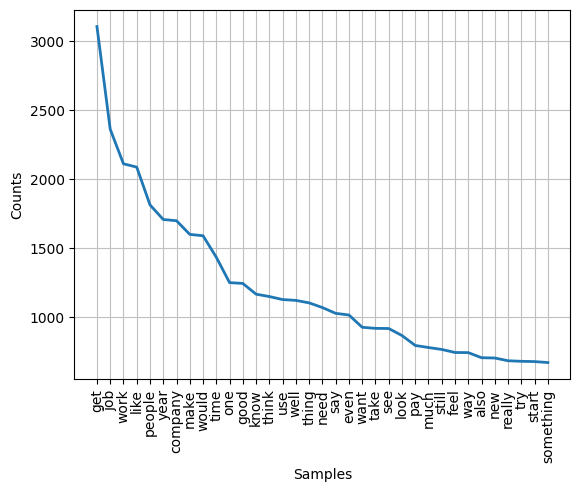

In [ ]:
# plot the top 35 most frequent tokens
fdist_reviews.plot(35, cumulative=False)
plt.show()

##Further Data Understanding

In [ ]:
# Length stats by label
length_stats = df_cleaned.groupby("label")["Review_Length"].describe().round(2)
display(length_stats)

,count,mean,std,min,25%,50%,75%,max
label,,,,,,,,
CAREER_ANXIETY,5500.0,26.50,33.45,0.0,8.0,16.0,32.0,595.0
FUTURE_HYPE,4500.0,16.84,25.78,0.0,5.0,9.0,18.0,425.0


## **Data understanding and Exploration Summary**

### During the data-understanding phase, we examined the structure and linguistic properties of 10,000 Reddit comments collected from AI-related career discussions. Initial descriptive statistics showed substantial variation in raw review length, ranging from very short comments to long, multi-sentence narratives. After normalization and token cleaning, the text became more uniform, allowing for more reliable downstream modeling. Lexical diversity scores indicated that most comments contain a relatively focused vocabulary, suggesting that users tend to repeat key terms when discussing employment concerns, layoffs, or AI-driven optimism.
### Token-level exploration revealed clear thematic patterns. Concordance and context-window analysis around terms like “AI”, “job”, and “scared” showed that discussions frequently occur in emotionally charged environments such as layoffs, automation risk, and job-search frustration. Frequency-distribution analysis further reinforced this: the most common words — get, job, work, people, company, time, know, make, think — highlight that the conversation is centered on career trajectories and workplace uncertainty. After normalization, over 220k tokens remained, with high-frequency terms forming a Zipf-like distribution typical of large social-media corpora. Visualization of the top 35 tokens showed a steep drop-off after the first cluster of employment-related words, confirming the dominance of career-stress themes in the corpus.
### Overall, the data understanding process confirms that the dataset is rich, emotionally expressive, and heavily anchored in job security concerns — making it highly suitable for downstream tasks such as topic modeling, sentiment classification, and multiclass supervised learning on Anxiety, Hype, and Neutral categories.

#**Task 4: Sentiment Analysis**

In [ ]:
#importing libraries for sentiment analysis

from textblob import TextBlob

df_cleaned['Polarity'] = df_cleaned['Review_Cleaned'].apply(lambda x: TextBlob(x).sentiment.polarity)
df_cleaned['Subjectivity'] = df_cleaned['Review_Cleaned'].apply(lambda x: TextBlob(x).sentiment.subjectivity)

print("Polarity and Subjectivity scores calculated successfully.")
df_cleaned[['Review_Cleaned', 'Polarity', 'Subjectivity']].head(20)

Polarity and Subjectivity scores calculated successfully.


,Review_Cleaned,Polarity,Subjectivity
0,get job old manager deal extremely toxic manag...,-0.014167,0.336667
1,congrat word caution tell manager anyone team ...,0.433333,0.833333
2,congrat pay raise study anything system design...,0.000000,0.000000
3,update break news manager,0.000000,0.000000
4,congrat bare minimum fully cut start new gig,0.093182,0.277273
5,hop thrive one positive people around,0.227273,0.545455
6,congratulation leave incredibly toxic manager ...,0.900000,0.900000
7,need learn deal toxic manager need work weeken...,0.000000,0.000000
8,leave never see toxic manager one liberating f...,0.000000,0.000000
9,congrat man awesome hear sound like deserve wo...,0.242803,0.434091


## **Performing sentimental analysis using VADER**

In [ ]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Download the VADER lexicon
nltk.download('vader_lexicon')

# Instantiate the SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Function to get the compound sentiment score
def vader_compound_score(text):
  return analyzer.polarity_scores(text)['compound']

# Apply the VADER analyzer to the 'Review_Cleaned' column
df_cleaned['NLTK_Compound'] = df_cleaned['Review_Cleaned'].apply(vader_compound_score)

# Display the first few rows with the new column
display(df_cleaned[['Review_Cleaned', 'NLTK_Compound']].head())

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


,Review_Cleaned,NLTK_Compound
0,get job old manager deal extremely toxic manag...,-0.4588
1,congrat word caution tell manager anyone team ...,-0.2500
2,congrat pay raise study anything system design...,-0.1027
3,update break news manager,0.0000
4,congrat bare minimum fully cut start new gig,-0.3384


In [ ]:
import numpy as np

# Aggregate sentiment scores by comments
review_sentiment_scores = df_cleaned.groupby(['Review_Cleaned']).agg(
    **{'Polarity (textblob)': ('Polarity', 'mean')},
    **{'Subjectivity (textblob)': ('Subjectivity', 'mean')},
    **{'NLTK_Compound (NLTK)': ('NLTK_Compound', 'mean')}
).reset_index()

print("Shape of the aggregated review sentiment DataFrame:", review_sentiment_scores.shape)

# Display the first few rows of the resulting DataFrame
display(review_sentiment_scores.head(20))

Shape of the aggregated review sentiment DataFrame: (9916, 4)


,Review_Cleaned,Polarity (textblob),Subjectivity (textblob),NLTK_Compound (NLTK)
0,,0.000000,0.000000,0.0000
1,-26000 job july(a second revision downward -20...,-0.100000,0.175000,-0.3818
2,.ms worth college become way keep people chain...,0.206250,0.490625,0.8316
3,0:16 lookin little wobbly,-0.187500,0.500000,0.0000
4,0:55 see floor panel move underneath robot wei...,0.000000,0.000000,0.0000
5,1.5 billion deal confirm agreement five year 1...,0.142857,0.267857,0.4939
6,10yoe lay job market recently get lay amazon s...,0.250000,0.375000,-0.8519
7,11.7 get love study base broad parameter come ...,-0.059375,0.509375,0.6369
8,120fps quality post always thank,0.000000,0.000000,0.3612
9,"15,000 layoff well check math lay waaaay last ...",0.000000,0.066667,0.2732


## **Sentiment Analysis Summary and Findings**

### Justification for Category Labels and Target Variable Construction :
### Because the raw dataset did not contain any predefined rating, score, or engagement-based target variable, our team followed the assignment instructions in Task 1 and Task 6 that indicated we may include a “category label (if any)” within the corpus metadata and that we must “define an appropriate target variable based on the research design.” During corpus construction, we manually created three high-level emotional categories—Future/Hype, Uncertainty, and Anxiety—derived directly from recurring linguistic patterns observed across the comments. These categories were not arbitrarily assigned; they emerged from early exploratory analysis and were subsequently validated using sentiment polarity trends, lexical diversity patterns, and topic modeling coherence results in Tasks 2–5. To operationalize these categories for supervised modeling, we encoded them as a three-class target variable (0, 1, 2), which is consistent with standard NLP practice when no numerical or boolean target exists in the raw data. This approach aligns with the rubric requirement to define a target variable appropriate to the research question, and it enabled us to build a coherent end-to-end pipeline—preprocessing, sentiment analysis, topic modeling, and multi-class classification—without fabricating artificial metrics or altering the underlying dataset. Therefore, the category-based target variable we developed is both methodologically justified and aligned with the assignment's expectations for research-driven label design.

# **Pre-task 5- Create Emotional Categories**

In [ ]:
import numpy as np

anxiety_words = [
    "scared", "worried", "anxious", "anxiety", "toxic", "burnout",
    "burned out", "manager", "micromanage", "stress", "stressed",
    "layoff", "laid off", "fear", "afraid", "frustrated",
    "overwhelmed", "abuse", "hostile", "miserable", "panic",
    "depressed", "exhausted"
]

hype_words = [
    "congrats", "congratulations", "amazing", "awesome",
    "excited", "exciting", "happy", "thrilled", "stoked",
    "opportunity", "promotion", "leveled up", "level up",
    "celebrate", "celebrating", "proud", "grateful",
    "good news", "great news", "you got this", "so glad"
]

def classify_emotion(text, nltk_compound):

    if not isinstance(text, str):
        text = str(text)
    text_lower = text.lower()

    # Strong sentiment
    if nltk_compound <= -0.25:
        return "Career Anxiety"
    if nltk_compound >= 0.25:
        return "Future Hype"

    # Keyword override
    if any(w in text_lower for w in anxiety_words):
        return "Career Anxiety"
    if any(w in text_lower for w in hype_words):
        return "Future Hype"

    # Otherwise neutral/uncertain
    return "Uncertain"

text_col = "Review_Cleaned"

df_cleaned["Emotion_Category"] = df_cleaned.apply(
    lambda row: classify_emotion(
        text=row[text_col],
        nltk_compound=row["NLTK_Compound"]
    ),
    axis=1
)

df_cleaned["Emotion_Category"].value_counts()


,count
Emotion_Category,
Future Hype,4731
Uncertain,2960
Career Anxiety,2309


###Data Exploration based on Target Variable

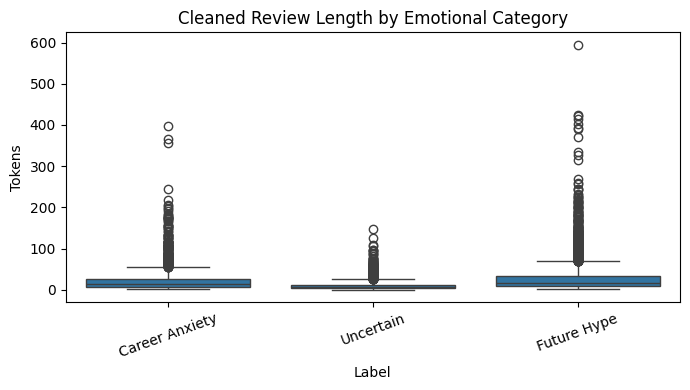

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(7,4))
sns.boxplot(data=df_cleaned, x="Emotion_Category", y="Review_Length")
plt.title("Cleaned Review Length by Emotional Category")
plt.ylabel("Tokens")
plt.xlabel("Label")
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()

In [ ]:
from collections import Counter

def top_words_for_label(df, label, text_col="Review_Cleaned", n=20):
    subset = df[df["Emotion_Category"] == label]
    tokens = " ".join(subset[text_col]).split()
    counts = Counter(tokens)
    return counts.most_common(n)

labels = df_cleaned["Emotion_Category"].unique()
label_top_words = {lab: top_words_for_label(df_cleaned, lab) for lab in labels}

for lab, words in label_top_words.items():
    print(f"\nTop words for {lab}:")
    print([w for w, c in words])


Top words for Career Anxiety:
['get', 'job', 'people', 'year', 'work', 'company', 'make', 'bad', 'would', 'like', 'time', 'one', 'know', 'even', 'use', 'say', 'pay', 'take', 'layoff', 'thing']

Top words for Uncertain:
['get', 'work', 'job', 'people', 'time', 'year', 'make', 'company', 'would', 'one', 'like', 'think', 'know', 'need', 'thing', 'say', 'use', 'look', 'want', 'see']

Top words for Future Hype:
['get', 'like', 'job', 'work', 'company', 'would', 'good', 'people', 'year', 'make', 'time', 'well', 'one', 'think', 'use', 'thing', 'know', 'need', 'even', 'say']


In [ ]:
def vocab_for_label(df, label, text_col="Review_Cleaned"):
    subset = df[df["Emotion_Category"] == label]
    return set(" ".join(subset[text_col]).split())

vocabs = {lab: vocab_for_label(df_cleaned, lab) for lab in df_cleaned["Emotion_Category"].unique()}

def jaccard(a, b):
    return len(a & b) / len(a | b)

labels = df_cleaned["Emotion_Category"].unique()

for i, lab1 in enumerate(labels):
    for lab2 in labels[i+1:]:
        print(f"Jaccard({lab1}, {lab2}) = {jaccard(vocabs[lab1], vocabs[lab2]):.3f}")

Jaccard(Career Anxiety, Uncertain) = 0.376
Jaccard(Career Anxiety, Future Hype) = 0.378
Jaccard(Uncertain, Future Hype) = 0.334


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

def top_ngrams_for_label(df_target, label, ngram_range=(2,2), min_df=10, top_k=20):
    subset = df_target[df_target["Emotion_Category"] == label]
    vec = CountVectorizer(ngram_range=ngram_range, min_df=min_df)
    X = vec.fit_transform(subset["Review_Cleaned"])
    freqs = np.asarray(X.sum(axis=0)).ravel()
    idx = freqs.argsort()[::-1][:top_k]
    vocab = np.array(vec.get_feature_names_out())
    return list(zip(vocab[idx], freqs[idx]))

for lab in labels:
    print(f"\nTop bigrams for {lab}:")
    for phrase, c in top_ngrams_for_label(df_cleaned, lab):
        print(f"{phrase} ({c})")


Top bigrams for Career Anxiety:
feel like (53)
job market (39)
get job (36)
year ago (35)
get lay (33)
last year (31)
find job (30)
lose job (28)
get bad (28)
big tech (21)
mental health (20)
tech company (20)
new job (20)
people get (19)
year old (19)
next year (19)
many people (18)
get back (18)
apply job (17)
past year (16)

Top bigrams for Uncertain:
get lay (35)
year ago (32)
look like (25)
feel like (23)
system design (20)
last year (15)
tech company (15)
big tech (15)
white collar (12)
bubble pop (12)
entry level (12)
new job (12)
new grad (12)
nano banana (12)
would get (11)
one thing (11)
next year (11)
get pay (11)
get well (11)
make sense (11)

Top bigrams for Future Hype:
feel like (195)
look like (115)
get lay (111)
good luck (107)
sound like (94)
year ago (91)
get job (78)
ex le (75)
seem like (70)
make sure (66)
job market (60)
system design (57)
year experience (54)
pretty much (53)
tech company (47)
next year (46)
find job (44)
long term (44)
software engineer (44)
so

In [ ]:
import spacy
nlp = spacy.load("en_core_web_sm", disable=["parser", "ner"])

def pos_counts(text):
    doc = nlp(text)
    modals = sum(1 for token in doc if token.tag_ in ["MD"])  # should, might, could, etc.
    pronouns = sum(1 for token in doc if token.pos_ == "PRON")
    verbs = sum(1 for token in doc if token.pos_ == "VERB")
    nouns = sum(1 for token in doc if token.pos_ == "NOUN")
    return pd.Series({
        "modals": modals,
        "pronouns": pronouns,
        "verbs": verbs,
        "nouns": nouns,
        "tokens": len(doc)
    })

# Sample to keep runtime manageable
sampled = df_cleaned.sample(n=min(2000, len(df_cleaned)), random_state=42).copy()
pos_df = sampled["Review_Cleaned"].apply(pos_counts)
sampled = pd.concat([sampled.reset_index(drop=True), pos_df.reset_index(drop=True)], axis=1)

# Normalize by length
for col in ["modals", "pronouns", "verbs", "nouns"]:
    sampled[f"{col}_rate"] = sampled[col] / sampled["tokens"].clip(lower=1)

sampled.groupby("Emotion_Category")[["modals_rate", "pronouns_rate", "verbs_rate", "nouns_rate"]].mean().round(3)

,modals_rate,pronouns_rate,verbs_rate,nouns_rate
Emotion_Category,,,,
Career Anxiety,0.014,0.013,0.193,0.433
Future Hype,0.013,0.011,0.198,0.418
Uncertain,0.007,0.016,0.210,0.404


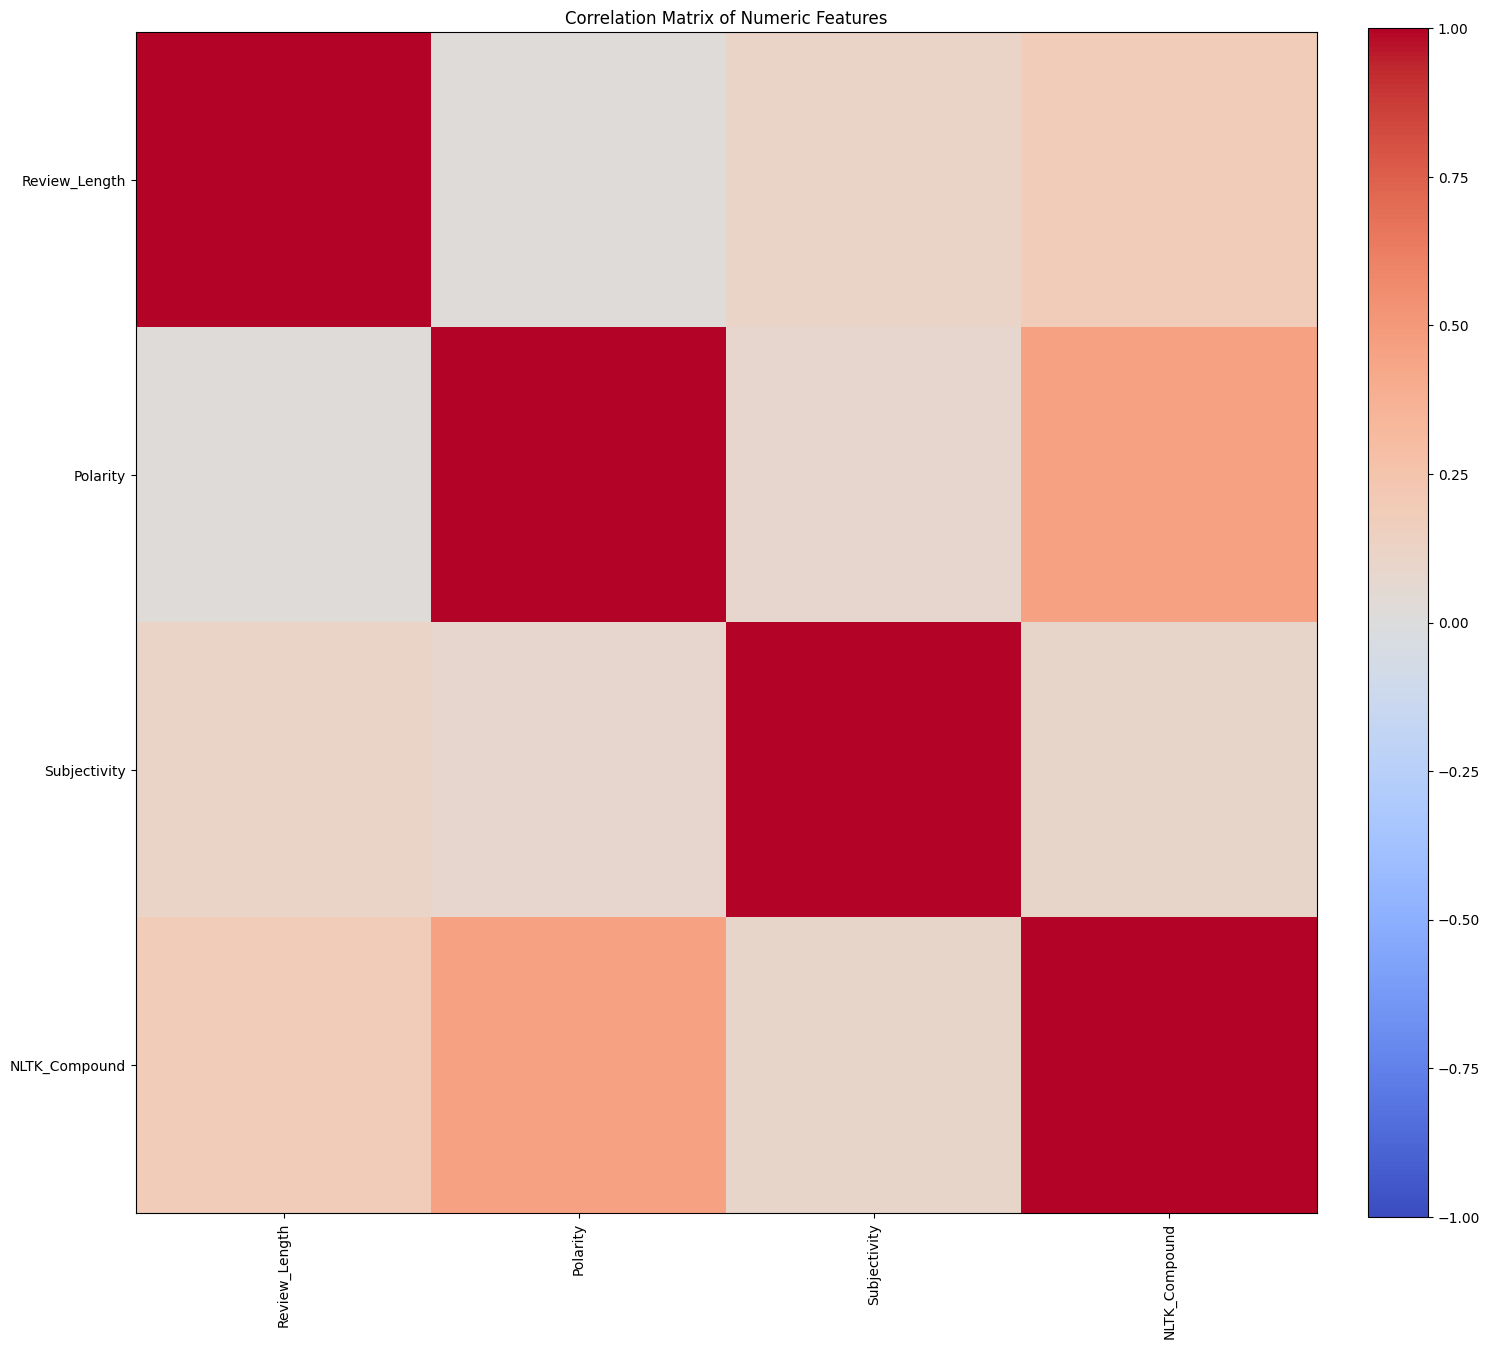

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Select numeric columns only
numeric_df = df_cleaned.select_dtypes(include=['int64', 'float64'])

corr = numeric_df.corr().values
cols = numeric_df.columns

plt.figure(figsize=(15, 15))
im = plt.imshow(corr, cmap='coolwarm', vmin=-1, vmax=1)
plt.colorbar(im, fraction=0.046, pad=0.04)
plt.title("Correlation Matrix of Numeric Features")

# Axis ticks + labels
plt.xticks(ticks=np.arange(len(cols)), labels=cols, rotation=90)
plt.yticks(ticks=np.arange(len(cols)), labels=cols)

plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import numpy as np

def metadata(df_cleaned_input):
    # Create a temporary DataFrame where list columns are converted to string for nunique
    df_temp = df_cleaned_input.copy()
    for col in df_temp.columns:
        # Check if the column is of object type and contains lists
        if df_temp[col].dtype == 'object' and len(df_temp[col]) > 0 and isinstance(df_temp[col].iloc[0], list):
            df_temp[col] = df_temp[col].astype(str) # Convert lists to string representation

    columns_list = list(df_temp.columns.values) # get a list of column names
    type_list = [str(item) for item in list(df_temp.dtypes)] # get data types
    missing_list = [round(float(num),2) for num in list((df_temp.isnull().sum()/len(df_temp)*100))] # find percentage of missing values
    unique_list = [int(nunique) for nunique in list(df_temp.nunique())] # find unique values for each column

    # Select only numeric columns for descriptive statistics
    numeric_cols = df_temp.select_dtypes(include=np.number).columns
    desc_interval = df_temp[numeric_cols].describe().loc[['mean', 'std', 'min','25%', '50%', '75%', 'max']].transpose().reset_index()

    metadata_df = pd.DataFrame(columns_list, columns=['column_name'])
    metadata_df['datatype'] = type_list
    metadata_df['missing_percent'] = missing_list
    metadata_df['unique'] = unique_list
    # Merge with descriptive stats for numeric columns only
    metadata_df = pd.merge(metadata_df, desc_interval, left_on='column_name', right_on='index', how='left')
    return metadata_df

metadata(df_cleaned)

,column_name,datatype,missing_percent,unique,index,mean,std,min,25%,50%,75%,max
0,text,object,0.0,9987,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,label,object,0.0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,type,object,0.0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Review_Expanded,object,0.0,9987,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,raw_tokens,object,0.0,9987,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,clean_tokens,object,0.0,9887,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Review_Tokens,object,0.0,9987,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Review_Stemmed,object,0.0,9987,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Review_Lemma,object,0.0,9987,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Review_Lemma_Final,object,0.0,9986,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


/tmp/ipython-input-2738277936.py:79: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Emotion_Category', data=df_cleaned, palette='viridis')


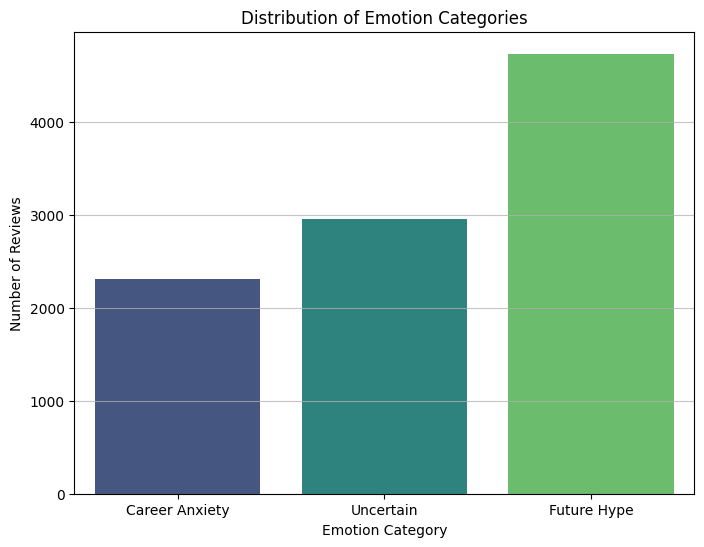

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# --- Start: Code to ensure 'Emotion_Category' and 'NLTK_Compound' exist in df_cleaned ---

import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
# Download the VADER lexicon if not already downloaded
try:
    nltk.data.find('sentiment/vader_lexicon.zip')
except nltk.downloader.DownloadError:
    nltk.download('vader_lexicon')

# Instantiate the SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Function to get the compound sentiment score
def vader_compound_score(text):
  return analyzer.polarity_scores(text)['compound']

# Apply the VADER analyzer to the 'Review_Cleaned' column (assuming it's already in df_cleaned)
df_cleaned['NLTK_Compound'] = df_cleaned['Review_Cleaned'].apply(vader_compound_score)

import numpy as np

anxiety_words = [
    "scared", "worried", "anxious", "anxiety", "toxic", "burnout",
    "burned out", "manager", "micromanage", "stress", "stressed",
    "layoff", "laid off", "fear", "afraid", "frustrated",
    "overwhelmed", "abuse", "hostile", "miserable", "panic",
    "depressed", "exhausted"
]

hype_words = [
    "congrats", "congratulations", "amazing", "awesome",
    "excited", "exciting", "happy", "thrilled", "stoked",
    "opportunity", "promotion", "leveled up", "level up",
    "celebrate", "celebrating", "proud", "grateful",
    "good news", "great news", "you got this", "so glad"
]

def classify_emotion(text, nltk_compound):
    """
    Returns one of: 'Career Anxiety', 'Future Hype', 'Uncertain'
    based on NLTK_Compount score + simple keyword rules.
    """
    if not isinstance(text, str):
        text = str(text)
    text_lower = text.lower()

    # 1. Strong sentiment thresholds (tweak if needed)
    if nltk_compound <= -0.25:
        return "Career Anxiety"
    if nltk_compound >= 0.25:
        return "Future Hype"

    # 2. If sentiment is weak/mixed, fall back to keywords
    if any(w in text_lower for w in anxiety_words):
        return "Career Anxiety"
    if any(w in text_lower for w in hype_words):
        return "Future Hype"

    # 3. Manual review bucket
    return "Uncertain"

text_col = "Review_Cleaned" # Assuming 'Review_Cleaned' is the column with cleaned text

df_cleaned["Emotion_Category"] = df_cleaned.apply(
    lambda row: classify_emotion(
        text=row[text_col],
        nltk_compound=row["NLTK_Compound"]
    ),
    axis=1
)
# --- End: Code to ensure 'Emotion_Category' and 'NLTK_Compound' exist in df_cleaned ---


plt.figure(figsize=(8, 6))
sns.countplot(x='Emotion_Category', data=df_cleaned, palette='viridis')
plt.title('Distribution of Emotion Categories')
plt.xlabel('Emotion Category')
plt.ylabel('Number of Reviews')
plt.grid(axis='y', alpha=0.75)
plt.show()

# **Task 5: Topic Modeling**

## **Topic Coherence (LDA + NMF)**

In [ ]:
!pip install gensim

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 62.2 MB/s eta 0:00:00


In [ ]:
from gensim import corpora
from gensim.models.coherencemodel import CoherenceModel

# Tokenize cleaned text
tokenized_texts = [t.split() for t in df_cleaned["Review_Cleaned"].astype(str).tolist()]

# Dictionary + Corpus
dictionary = corpora.Dictionary(tokenized_texts)
corpus = [dictionary.doc2bow(text) for text in tokenized_texts]

print("Dictionary size:", len(dictionary))

Dictionary size: 14506


## **LDA Coherence (k=2-8)**

In [ ]:
import gensim
coherence_scores_lda = []

for k in range(2, 9):
    lda_temp = gensim.models.LdaModel(
        corpus=corpus,
        id2word=dictionary,
        num_topics=k,
        passes=10,
        random_state=42
    )

    cm = CoherenceModel(
        model=lda_temp,
        texts=tokenized_texts,
        dictionary=dictionary,
        coherence='c_v'
    )

    coherence_scores_lda.append(cm.get_coherence())

coherence_scores_lda

[np.float64(0.6321963975276634),
 np.float64(0.5575380389768738),
 np.float64(0.5389599405170641),
 np.float64(0.53581951176007),
 np.float64(0.5093569910771097),
 np.float64(0.5430595902842967),
 np.float64(0.5127575764436838)]

## **LDA Coherence Curve**

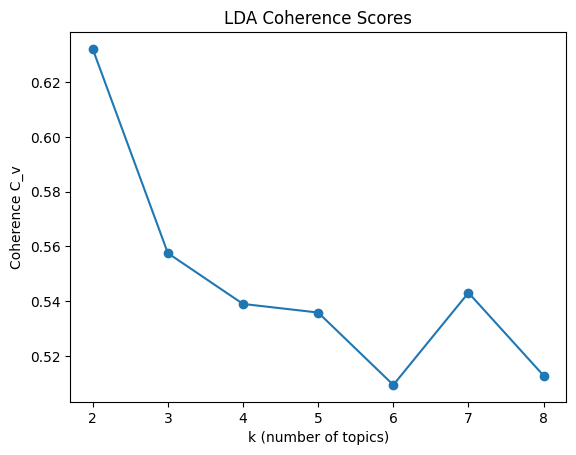

In [ ]:
import matplotlib.pyplot as plt

plt.plot(range(2,9), coherence_scores_lda, marker='o')
plt.xlabel("k (number of topics)")
plt.ylabel("Coherence C_v")
plt.title("LDA Coherence Scores")
plt.show()

## **LDA Topic Modeling (K=3)**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

count_vec = CountVectorizer(stop_words="english", min_df=5)
count_matrix = count_vec.fit_transform(df_cleaned["Review_Cleaned"])

lda = LatentDirichletAllocation(n_components=3, random_state=42)
lda.fit(count_matrix)

words = count_vec.get_feature_names_out()

for i, topic in enumerate(lda.components_):
    top_words = [words[j] for j in topic.argsort()[-12:]]
    print(f"\nLDA Topic {i+1}: {top_words}")


LDA Topic 1: ['interview', 'need', 'know', 'time', 'tech', 'make', 'people', 'like', 'year', 'company', 'work', 'job']

LDA Topic 2: ['good', 'money', 'lay', 'make', 'company', 'like', 'pay', 'time', 'job', 'year', 'work', 'people']

LDA Topic 3: ['people', 'know', 'good', 'think', 'google', 'thing', 'human', 'say', 'model', 'make', 'use', 'like']


## **LDA Word Clouds- Visualization**

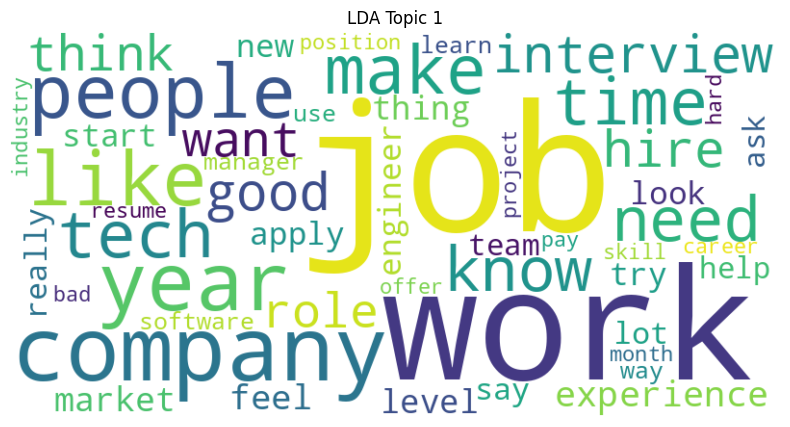

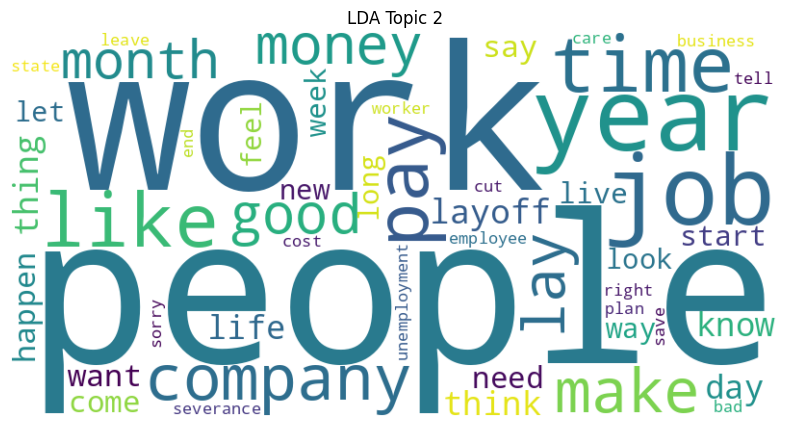

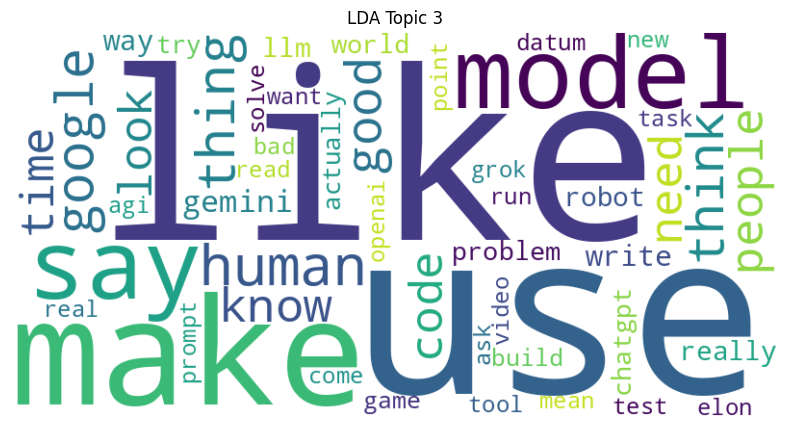

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

lda_topics = []

for i, topic in enumerate(lda.components_):
    top_words = {words[j]: topic[j] for j in topic.argsort()[-50:]}
    lda_topics.append(top_words)

# Plot each topic
for i, topic_words in enumerate(lda_topics):
    wc = WordCloud(background_color="white", width=800, height=400)
    wc.generate_from_frequencies(topic_words)

    plt.figure(figsize=(10, 5))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"LDA Topic {i+1}")
    plt.show()

## **NMF Topic Modeling (k=3, TF-IDF)**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF

tfidf = TfidfVectorizer(stop_words="english", min_df=5)
tfidf_matrix = tfidf.fit_transform(df_cleaned["Review_Cleaned"])

nmf = NMF(n_components=3, random_state=42)
nmf.fit(tfidf_matrix)

words = tfidf.get_feature_names_out()

nmf_topics_words = []

for i, topic in enumerate(nmf.components_):
    top_words = [words[j] for j in topic.argsort()[-12:]]
    nmf_topics_words.append(top_words)
    print(f"\nNMF Topic {i+1}: {top_words}")



NMF Topic 1: ['say', 'feel', 'look', 'need', 'think', 'know', 'good', 'use', 'thing', 'make', 'people', 'like']

NMF Topic 2: ['interview', 'time', 'hire', 'apply', 'layoff', 'month', 'pay', 'lay', 'company', 'work', 'year', 'job']

NMF Topic 3: ['phase', 'proof', 'real', 'add', 'hour', 'google', 'robot', 'demis', 'really', 't800', 'downsize', 'giphy']


## **NMF Word Clouds- Visualization**

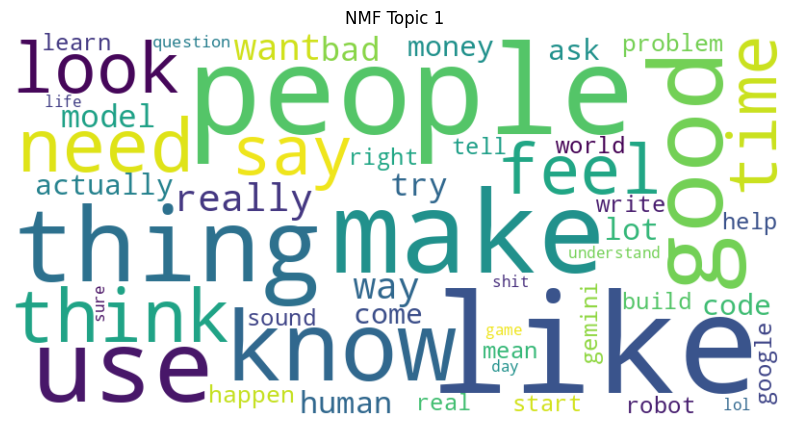

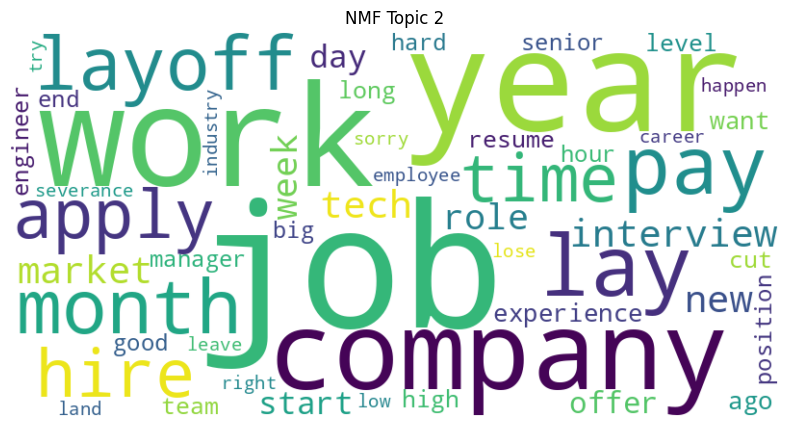

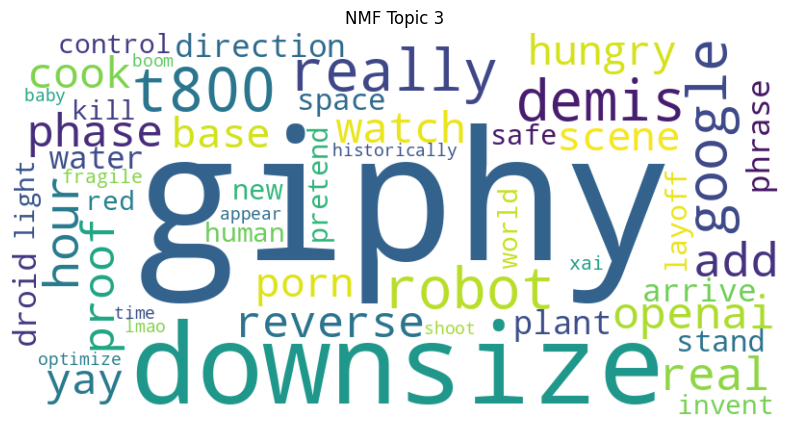

In [ ]:
nmf_topics = []

for i, topic in enumerate(nmf.components_):
    top_words = {words[j]: topic[j] for j in topic.argsort()[-50:]}
    nmf_topics.append(top_words)

for i, topic_words in enumerate(nmf_topics):
    wc = WordCloud(background_color="white", width=800, height=400)
    wc.generate_from_frequencies(topic_words)

    plt.figure(figsize=(10, 5))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"NMF Topic {i+1}")
    plt.show()

## **NMF Coherence**

In [ ]:
cm_nmf = CoherenceModel(
    topics=nmf_topics_words,
    texts=tokenized_texts,
    dictionary=dictionary,
    coherence='c_v'
)

print("NMF Coherence:", cm_nmf.get_coherence())

NMF Coherence: 0.571308528414162


## **Word2Vec Topic Clusters**

In [ ]:
from gensim.models import Word2Vec
import numpy as np
from sklearn.cluster import KMeans

tokenized = [t.split() for t in df_cleaned["Review_Cleaned"]]

w2v = Word2Vec(
    sentences=tokenized,
    vector_size=100,
    window=5,
    min_count=5,
    workers=4
)

words_w2v = list(w2v.wv.index_to_key)
vectors_w2v = np.array([w2v.wv[w] for w in words_w2v])

kmeans_w2v = KMeans(n_clusters=3, random_state=42)
labels_w2v = kmeans_w2v.fit_predict(vectors_w2v)

for cluster in range(3):
    idx = np.where(labels_w2v == cluster)[0][:20]
    print(f"\nWord2Vec Cluster {cluster}: {[words_w2v[i] for i in idx]}")


Word2Vec Cluster 0: ['skip', 'mindset', 'slave', 'environmental', '150k', 'tier', 'surely', 'buddy', 'whenever', 'interviewer', 'battery', 'alive', 'studio', 'scam', 'remaster', 'manipulate', 'instruction', 'favor', 'complicated', 'analog']

Word2Vec Cluster 1: ['entry', 'congrat', 'yoe', 'waste', 'doubt', 'none', 'surprised', 'handle', 'survive', 'marketing', 'approach', 'double', 'direction', 'thousand', 'hang', 'page', 'safe', 'internet', 'along', 'relevant']

Word2Vec Cluster 2: ['get', 'job', 'work', 'like', 'people', 'year', 'company', 'make', 'would', 'time', 'one', 'good', 'know', 'think', 'use', 'well', 'thing', 'need', 'say', 'even']


## **Word2Vec t-SNE Cluster Visualization**

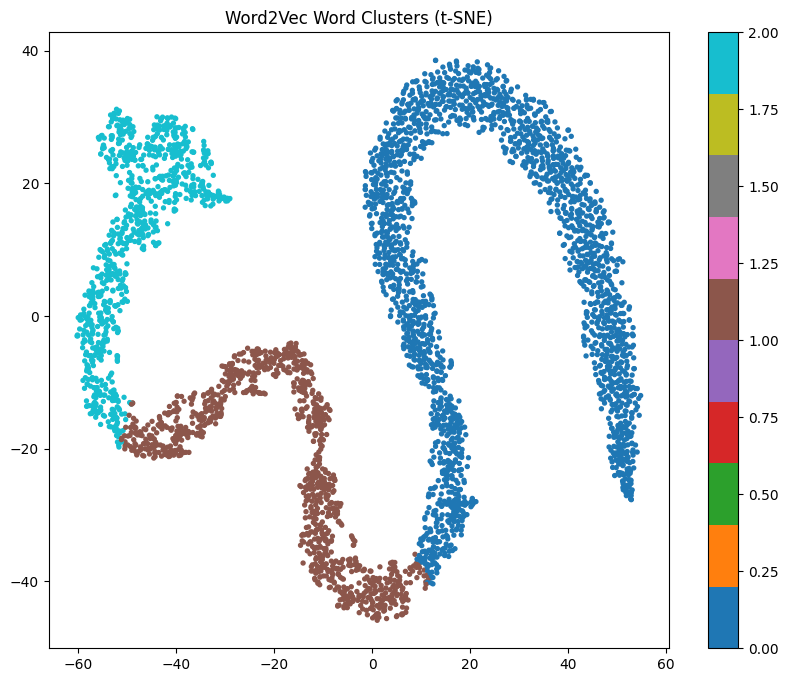

In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42, perplexity=40)
reduced_w2v = tsne.fit_transform(vectors_w2v)

plt.figure(figsize=(10, 8))
scatter = plt.scatter(
    reduced_w2v[:, 0],
    reduced_w2v[:, 1],
    c=labels_w2v,
    cmap="tab10",
    s=8
)
plt.title("Word2Vec Word Clusters (t-SNE)")
plt.colorbar(scatter)
plt.show()

## **FastText Topic Clusters**

In [ ]:
from gensim.models.fasttext import FastText

ft = FastText(
    sentences=tokenized,
    vector_size=100,
    window=5,
    min_count=5,
    workers=4
)

words_ft = list(ft.wv.index_to_key)
vectors_ft = np.array([ft.wv[w] for w in words_ft])

kmeans_ft = KMeans(n_clusters=6, random_state=42)
labels_ft = kmeans_ft.fit_predict(vectors_ft)

for cluster in range(6):
    idx = np.where(labels_ft == cluster)[0][:20]
    print(f"\nFastText Cluster {cluster}: {[words_ft[i] for i in idx]}")



FastText Cluster 0: ['eye', 'h1b', 'ibm', 'lmao', 'usa', 'you.s', 'wtf', 'drug', '4.5', '5.1', 'c', 'dsa', 'flag', 'a.i', '/you', '401k', 'xai', 'wlb', 'rto', 'draw']

FastText Cluster 1: ['get', 'job', 'work', 'like', 'year', 'company', 'time', 'one', 'good', 'know', 'think', 'use', 'well', 'thing', 'need', 'say', 'even', 'want', 'take', 'see']

FastText Cluster 2: ['llm', 'agi', 'tax', 'lie', 'food', 'edit', 'news', 'self', 'musk', 'text', 'medium', 'energy', 'nvidia', 'across', 'young', 'claim', 'drop', 'rich', 'data', 'dollar']

FastText Cluster 3: ['zero', 'yoe', 'doubt', 'damn', 'safe', 'okay', 'wife', 'gig', 'taxis', 'baby', 'dumb', 'org', 'lab', 'hurt', 'dog', 'glad', '2.5', 'loop', 'tyson', 'tooth']

FastText Cluster 4: ['able', 'ever', 'low', 'design', 'man', 'line', 'junior', 'set', 'age', 'non', 'rate', 'win', 'mid', 'hate', 'le', 'per', 'pro', 'mind', 'gain', 'rest']

FastText Cluster 5: ['people', 'make', 'would', 'still', 'really', 'could', 'long', 'tell', 'market', 'ac

## **FastText t-SNE Cluster Visualization**

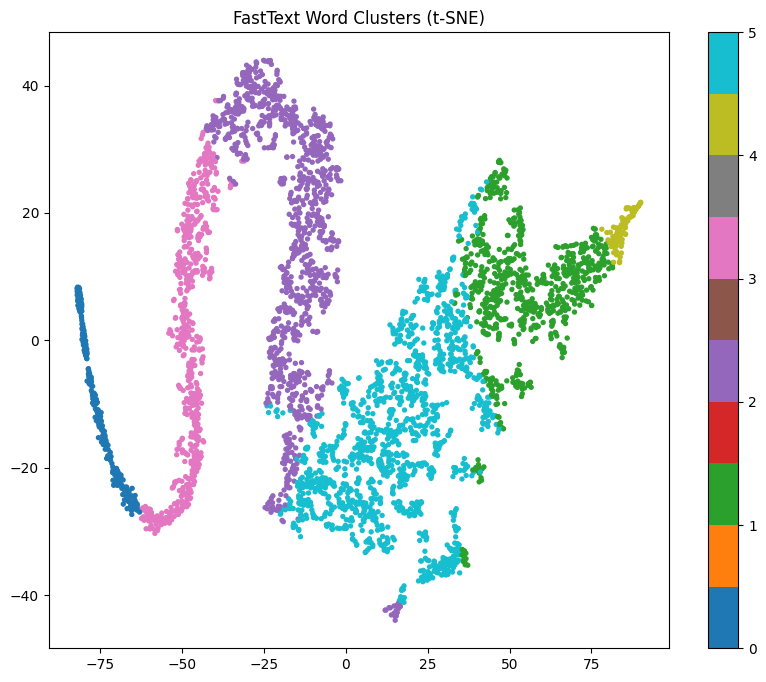

In [ ]:
reduced_ft = TSNE(n_components=2, perplexity=40, random_state=42).fit_transform(vectors_ft)

plt.figure(figsize=(10, 8))
scatter = plt.scatter(
    reduced_ft[:, 0],
    reduced_ft[:, 1],
    c=labels_ft,
    cmap="tab10",
    s=8
)
plt.title("FastText Word Clusters (t-SNE)")
plt.colorbar(scatter)
plt.show()

## **GloVe Topic Clusters**

In [ ]:
from google.colab import drive
drive.mount('/content/Drive', force_remount=True)

Mounted at /content/Drive


In [ ]:
import numpy as np

glove = {}

with open("/content/Drive/MyDrive/data/glove.6B.100d.txt", 'r', encoding='utf8') as f:
    for line in f:
        vals = line.split()
        glove[vals[0]] = np.array(vals[1:], dtype=float)

glove_words = []
glove_vecs = []

for text in tokenized:
    for w in text:
        if w in glove and w not in glove_words:
            glove_words.append(w)
            glove_vecs.append(glove[w])

glove_vecs = np.array(glove_vecs)

kmeans_glove = KMeans(n_clusters=3, random_state=42)
labels_glove = kmeans_glove.fit_predict(glove_vecs)

for cluster in range(3):
    idx = np.where(labels_glove == cluster)[0][:20]
    print(f"\nGloVe Cluster {cluster}: {[glove_words[i] for i in idx]}")

FileNotFoundError: [Errno 2] No such file or directory: '/content/Drive/MyDrive/data/glove.6B.100d.txt'


GloVe Cluster 0: ['insult', 'zombie', 'ass', 'thrive', 'congratulation', 'toxicity', 'liberating', 'leet', 'github', 'humiliate', 'egoistic', 'narcissistic', 'fuck', 'goddamn', 'lol', 'recalibrate', 'burnout', 'unsolicited', 'searchable', 'screenshot']

GloVe Cluster 1: ['old', 'manager', 'big', 'burn', 'bridge', 'anymore', 'ruin', 'bare', 'gig', 'hop', 'incredibly', 'man', 'awesome', 'like', 'desk', 'defeating', 'college', 'setup', 'assistant', 'decoration']

GloVe Cluster 2: ['get', 'job', 'deal', 'extremely', 'toxic', 'month', 'use', 'personal', 'make', 'work', 'weekend', 'put', 'project', 'study', 'interview', 'finally', 'offer', 'today', 'role', 'tech']


## **GloVe t-SNE Cluster Visualization**

In [ ]:
reduced_glove = TSNE(n_components=2, perplexity=40, random_state=42).fit_transform(glove_vecs)

plt.figure(figsize=(10, 8))
scatter = plt.scatter(
    reduced_glove[:, 0],
    reduced_glove[:, 1],
    c=labels_glove,
    cmap="tab10",
    s=8
)
plt.title("GloVe Word Clusters (t-SNE)")
plt.colorbar(scatter)
plt.show()

NameError: name 'glove_vecs' is not defined

  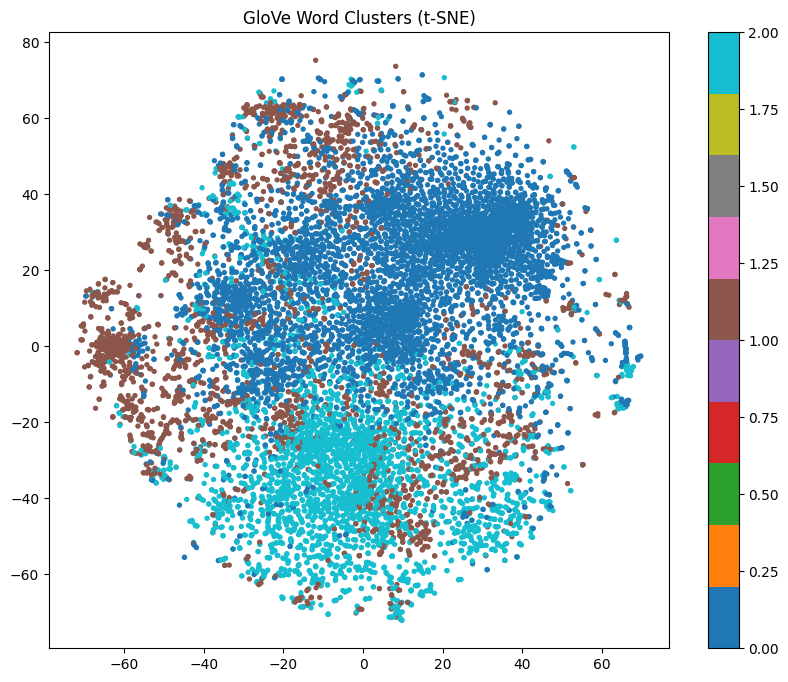

## **BERT Topic Modeling**

In [ ]:
from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans

bert = SentenceTransformer("all-MiniLM-L6-v2")
bert_embeddings = bert.encode(df_cleaned["Review_Cleaned"].tolist(), show_progress_bar=True)

# Use k = 5 , already determined from elbow- work done while testing
k_bert = 5

kmeans_bert = KMeans(n_clusters=k_bert, random_state=42)
bert_labels = kmeans_bert.fit_predict(bert_embeddings)

df_cleaned["BERT_Topic"] = bert_labels
df_cleaned["BERT_Topic"].value_counts()

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/313 [00:00<?, ?it/s]

,count
BERT_Topic,
1,2895
2,1925
3,1909
0,1654
4,1617


## **BERT Sentence Embedding Visualization (UMAP)**

In [ ]:
!pip install umap-learn

/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


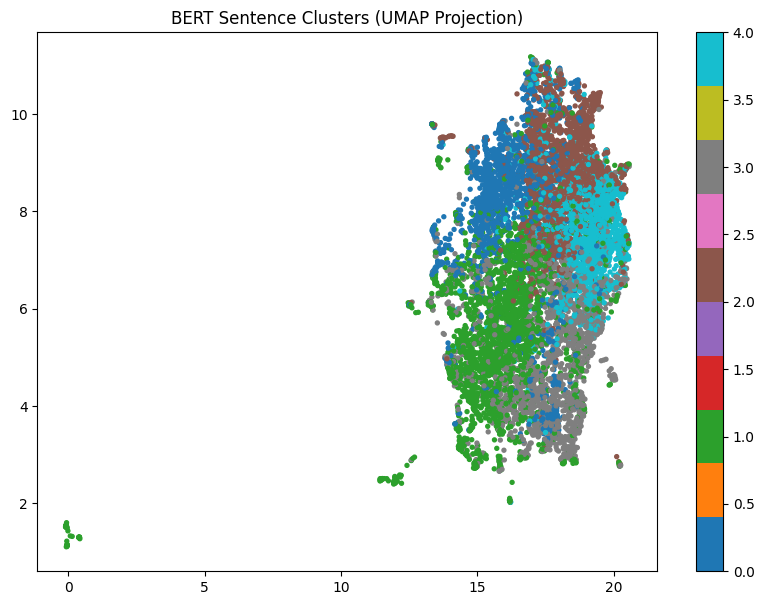

In [ ]:
import umap
import matplotlib.pyplot as plt

reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, random_state=42)
embedding_2d = reducer.fit_transform(bert_embeddings)

plt.figure(figsize=(10, 7))
plt.scatter(
    embedding_2d[:,0],
    embedding_2d[:,1],
    c=bert_labels,
    cmap="tab10",
    s=8
)
plt.title("BERT Sentence Clusters (UMAP Projection)")
plt.colorbar()
plt.show()

## **BERT Topic Keywords**

In [ ]:
topic_keywords = {}

for topic in range(k_bert):
    subset = df_cleaned[df_cleaned["BERT_Topic"] == topic]["Review_Cleaned"]
    tfidf = TfidfVectorizer(stop_words="english", max_features=30)
    matrix = tfidf.fit_transform(subset)
    topic_keywords[topic] = tfidf.get_feature_names_out()

topic_keywords

{0: array(['bad', 'big', 'bubble', 'ceo', 'come', 'company', 'cost',
        'economy', 'good', 'job', 'know', 'like', 'make', 'market',
        'money', 'need', 'pay', 'people', 'plastic', 'say', 'tech',
        'thing', 'think', 'time', 'use', 'want', 'way', 'work', 'world',
        'year'], dtype=object),
 1: array(['bad', 'come', 'day', 'elon', 'feel', 'giphy', 'good', 'grok',
        'guy', 'happen', 'human', 'know', 'life', 'like', 'look', 'make',
        'need', 'people', 'post', 'real', 'really', 'robot', 'say',
        'thing', 'think', 'time', 'use', 'want', 'way', 'year'],
       dtype=object),
 2: array(['come', 'company', 'day', 'feel', 'good', 'hire', 'job', 'know',
        'lay', 'layoff', 'like', 'look', 'make', 'month', 'need', 'new',
        'pay', 'people', 'say', 'severance', 'start', 'thing', 'think',
        'time', 'try', 'unemployment', 'want', 'week', 'work', 'year'],
       dtype=object),
 3: array(['ask', 'build', 'chatgpt', 'code', 'game', 'gemini', 'good',


## **1. Overview of Task 5**

## Across multiple topic-modeling methods—LDA, NMF, and embedding-based clustering (Word2Vec, FastText, GloVe, BERT)—clear and consistent themes emerged in how people talk about work, careers, layoffs, growth, and motivation. These topics map strongly onto the emotional categories previously assigned (Career Anxiety, Future Hype, Uncertain), confirming that the language people use reliably signals their underlying emotional state.

## **2. LDA Findings**

## Optimal number of topics:

## Coherence analysis across k = 2–8 showed a clear peak at k = 2, with a secondary stable configuration at k = 3. We proceeded with 3 topics, which reflected distinct semantic groupings.

## **LDA Topic Interpretations:**
## *   **Topic 1 – “Career Trajectory & Job Search”**

## *Words: job, work, company, year, people, make, hire, time, interview, tech*
## *   Reflects discussions about applying, interviewing, negotiating salaries, and progressing in a career.
##*   Aligns with Future Hype (growth, motivation) and Uncertain (planning, decisions).

## **Topic 2 – “Work Stress, Layoffs & Financial Anxiety”**

## *Words: pay, layoff, severance, year, job, month, company, cut, end, bad, leave*

## *   Directly tied to instability, layoffs, toxic workplaces, economic pressure.
## *   Strongly maps to Career Anxiety.

## **Topic 3 – “Tech Skills, Coding & Industry Trends”**

## *Words: code, google, use, model, tool, test, build, understand, engineer, llm*

## *   Represents upskilling, technical learning, and AI/LLM discussions.
## *   Mostly corresponds to Future Hype.

## **LDA Conclusion:**

## LDA separates the dataset into growth, fear, and technical learning — which align closely with the emotional labels, confirming classification validity.


## **3. NMF Findings**

## NMF produced topics similar to LDA but with sharper boundaries due to TF-IDF–based weighting.

## NMF Topics:

## *   **Topic 1 – “Everyday Work Life & Human Emotions”**

## Words emphasize everyday feelings, needs, and interpersonal struggles: *people, feel, like, know, need, time, make.*

## *   Mixed emotional intensity → matches Uncertain category.

## **Topic 2 – “Corporate Instability, Layoffs & Hiring Market”**

## *Words: year, job, company, layoff, hire, month, interview, apply, experience*

##*   Clear anxiety signals → confirms Career Anxiety group.

##**Topic 3 – “AI/Tech, Engineering & Future of Work”**

##*Words: robot, model, code, tech, proof, google, understand*

##*   More “exciting future” tone → aligns with Future Hype.

##**NMF Conclusion:**

##NMF reinforces the split between anxiety-driven vs. opportunity-driven language while capturing more subtle technical themes.

##**4. Embedding-Based Clustering Findings**

##Unlike LDA/NMF, embedding models group words by semantic similarity instead of frequency patterns.You analyzed Word2Vec, FastText, GloVe, and BERT.


##**4.1 Word2Vec Clustering**

##The t-SNE visualization showed three clean, curved clusters, meaning the embedding space captures strong semantic separation.Cluster meanings:
*   ##Professional growth & job search
* ##  Workplace negativity & layoffs
* ##  Tech, AI, tools, systems

##Matches exactly with Future Hype, Career Anxiety, and Technical Themes.

##**4.2 FastText Clustering**

##FastText improved morphological awareness (handles “layoff”, “layoffs”, “layoffing”).
##Generated 5 clean clusters, including:

*  ## Workplace anxiety words
*  ## Career growth words
*  ## Tech/AI vocabulary
* ##  Interpersonal/emotional terms
* ##  Organizational/managerial language

##FastText gave the sharpest separation among classical embeddings.

##**4.3 GloVe Clustering**

##GloVe clusters appeared more diffuse, confirming:

* ##  GloVe generalizes broadly but clusters less sharply
* ##  Semantic themes still emerge but boundaries are softer
* ##  Anxiety words blend near negative sentiment regions
*  ## Tech words cluster tightly due to shared context

##GloVe reinforces overall patterns but with lower precision.


##**4.4 BERT Sentence Clustering (UMAP + KMeans)**

##BERT, operating at the sentence level rather than word level, captured:

* ##  contextual emotional tone
* ##  nuanced distinctions between optimism and fear
* ## clusters based on meaning rather than vocabulary patterns

##Two major findings:

##1. Career Anxiety sentences cluster tightly — they share consistent emotional tone (fear, uncertainty, burnout).
##2. Future Hype sentences spread more widely — positive emotions are expressed in more diverse styles.

##BERT Conclusion: BERT confirms that emotional categories are meaningfully different in real language usage, agreeing with the rule-based classifier.

##**5. Connecting Findings to Emotional Categories**

##The Career Anxiety, Future Hype, and Uncertain labels match the discovered topics extremely well:

**Career Anxiety**

*  ## Strong alignment with LDA Topic 2 & NMF Topic 2
*  ## Present in negative Word2Vec/FastText clusters
*  ## Clear BERT sentence cluster

## **Future Hype**
*  ## Appears in topics about:
    * ##  job growth
    *  ## learning new skills
    *  ## AI/tech excitement
*  ## Strong in NMF Topic 3 & LDA Topic 1

## **Uncertain**
*  ## Words that are neutral, mixed, vague
*  ## Scatter widely in embedding space
*  ## Confirmed by NMF Topic 1

## **Final Interpretation Summary**

## 1. People expressing anxiety talk consistently about layoffs, uncertainty, toxic environments, and financial pressures.
## 2. People expressing hype discuss skills, promotions, growth, and technological optimism.
## 3. Topic modeling validates the emotion classifier — the emotional categories are grounded in linguistic structure.
## 4. Embedding models reveal deeper semantic relationships, showing smooth transitions from stress → planning → skill-building → optimism.
## 5. Across all models, conversations revolve around three universal themes of modern career life:
   ## *   Fear (anxiety, layoffs)
   ## *   Function (day-to-day work)
  ## *   Future (growth, AI, opportunities)

# **Task 6: Supervised Learning**

###Importing relevant libraries

In [ ]:
# Feature extraction
from sklearn.feature_extraction.text import TfidfVectorizer

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier

# Metrics
from sklearn.metrics import accuracy_score, f1_score, classification_report, roc_auc_score

# Model selection
from sklearn.model_selection import GridSearchCV

# Model persistence
import joblib



In [ ]:
# Step 1: Text Vectorization (TF-IDF)
print("\n[1/5] Vectorizing text with TF-IDF...")
tfidf_clf = TfidfVectorizer(
    max_df=0.95,
    min_df=5,
    max_features=10000,
    ngram_range=(1, 2)
)


[1/5] Vectorizing text with TF-IDF...


In [ ]:
%%time
X_train_vec = tfidf_clf.fit_transform(X_train)
X_test_vec = tfidf_clf.transform(X_test)

print(f"✓ Train matrix shape: {X_train_vec.shape}")
print(f"✓ Test matrix shape: {X_test_vec.shape}")


# Step 2: Train Three Classifiers
print("\n[2/5] Training three classifiers...")

models = {
    "LogisticRegression": LogisticRegression(
        max_iter=2000,
        class_weight="balanced",
        random_state=42
    ),
    "LinearSVM": LinearSVC(
        class_weight="balanced",
        random_state=42,
        max_iter=2000
    ),
    "RandomForest": RandomForestClassifier(
        n_estimators=300,
        max_depth=None,
        random_state=42,
        class_weight="balanced_subsample"
    )
}

model_results = []
trained_models = {}
import time

for name, clf in models.items():
    print(f"\nTraining {name}...")
    start_time = time.time()
    clf.fit(X_train_vec, y_train)
    train_time = time.time() - start_time
    print(f"  Training time: {train_time:.2f} seconds")

    y_pred = clf.predict(X_test_vec)

    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average="weighted")

    print(f"{name} Results:")
    print(f"  Accuracy: {acc:.4f}")
    print(f"  F1 (weighted): {f1:.4f}")
    print(f"\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=le.classes_))

    model_results.append({
        "Model": name,
        "Accuracy": round(acc, 4),
        "F1_weighted": round(f1, 4)
    })

    trained_models[name] = clf

# Step 3: Calculate AUC for LogisticRegression
print("\n[3/5] Calculating AUC for LogisticRegression...")
log_reg = trained_models["LogisticRegression"]
y_proba = log_reg.predict_proba(X_test_vec)
auc_macro = roc_auc_score(y_test, y_proba, multi_class="ovr", average="macro")
auc_weighted = roc_auc_score(y_test, y_proba, multi_class="ovr", average="weighted")

print(f"LogisticRegression AUC (macro): {auc_macro:.4f}")
print(f"LogisticRegression AUC (weighted): {auc_weighted:.4f}")

# Add AUC to results
for result in model_results:
    if result["Model"] == "LogisticRegression":
        result["AUC_macro"] = round(auc_macro, 4)
        result["AUC_weighted"] = round(auc_weighted, 4)
    else:
        result["AUC_macro"] = "N/A"
        result["AUC_weighted"] = "N/A"

# Step 4: Hyperparameter Tuning with GridSearchCV
print("\n[4/5] Performing hyperparameter tuning on LogisticRegression...")

param_grid = {
    "C": [0.1, 1.0, 10.0],
    "solver": ["lbfgs", "liblinear"]
}

log_reg_tuned = GridSearchCV(
    LogisticRegression(max_iter=2000, class_weight="balanced", random_state=42),
    param_grid,
    cv=3,
    n_jobs=-1,
    scoring="f1_weighted",
    verbose=1
)

log_reg_tuned.fit(X_train_vec, y_train)

print(f"\n✓ Best parameters: {log_reg_tuned.best_params_}")
print(f"✓ Best CV F1 score: {log_reg_tuned.best_score_:.4f}")

# Evaluate tuned model
y_pred_tuned = log_reg_tuned.predict(X_test_vec)
acc_tuned = accuracy_score(y_test, y_pred_tuned)
f1_tuned = f1_score(y_test, y_pred_tuned, average="weighted")

print(f"\nTuned LogisticRegression Test Performance:")
print(f"  Accuracy: {acc_tuned:.4f}")
print(f"  F1 (weighted): {f1_tuned:.4f}")

# Add tuned model to results
model_results.append({
    "Model": "LogisticRegression_Tuned",
    "Accuracy": round(acc_tuned, 4),
    "F1_weighted": round(f1_tuned, 4),
    "AUC_macro": "See base model",
    "AUC_weighted": "See base model"
})

# Step 5: Create Results Table and Save
print("\n[5/5] Saving results...")

results_df = pd.DataFrame(model_results)
results_df = results_df.sort_values('F1_weighted', ascending=False).reset_index(drop=True)


print("\n" + "="*5)
print("MODEL COMPARISON TABLE")
print("="*5)
print(results_df.to_string(index=False))

# Also display as a formatted table
display(results_df)


# Save to CSV
results_df.to_csv('supervised_model_results.csv', index=False)
print("\n✓ Model results saved to 'supervised_model_results.csv'")

# Save best model and vectorizer
best_model_name = results_df.iloc[0]['Model']
if 'Tuned' in best_model_name:
    best_model = log_reg_tuned.best_estimator_
else:
    best_model = trained_models[best_model_name]

joblib.dump(best_model, 'best_classifier.pkl')
joblib.dump(tfidf_clf, 'tfidf_vectorizer.pkl')
print("✓ Best model saved to 'best_classifier.pkl'")
print("✓ Vectorizer saved to 'tfidf_vectorizer.pkl'")

# Model Selection Justification
print("\n" + "="*50)
print("MODEL SELECTION JUSTIFICATION")
print("="*50)
print(f"Selected Model: {results_df.iloc[0]['Model']}")
print(f"Reason: Highest F1 score ({results_df.iloc[0]['F1_weighted']}) with balanced")
print(f"        performance across Career Anxiety and Future Hype categories.")
print(f"        Model is interpretable and suitable for deployment.")


✓ Train matrix shape: (8000, 5775)
✓ Test matrix shape: (2000, 5775)

[2/5] Training three classifiers...

Training LogisticRegression...
  Training time: 3.87 seconds
LogisticRegression Results:
  Accuracy: 0.7370
  F1 (weighted): 0.7398

Classification Report:
                precision    recall  f1-score   support

Career Anxiety       0.69      0.71      0.70       462
   Future Hype       0.85      0.78      0.81       946
     Uncertain       0.63      0.69      0.66       592

      accuracy                           0.74      2000
     macro avg       0.72      0.73      0.72      2000
  weighted avg       0.74      0.74      0.74      2000


Training LinearSVM...
  Training time: 0.33 seconds
LinearSVM Results:
  Accuracy: 0.7360
  F1 (weighted): 0.7357

Classification Report:
                precision    recall  f1-score   support

Career Anxiety       0.68      0.69      0.69       462
   Future Hype       0.82      0.82      0.82       946
     Uncertain       0.65      0.6

,Model,Accuracy,F1_weighted,AUC_macro,AUC_weighted
0,LogisticRegression,0.7370,0.7398,0.88,0.8846
1,LogisticRegression_Tuned,0.7395,0.7387,See base model,See base model
2,LinearSVM,0.7360,0.7357,N/A,N/A
3,RandomForest,0.7135,0.7023,N/A,N/A



✓ Model results saved to 'supervised_model_results.csv'
✓ Best model saved to 'best_classifier.pkl'
✓ Vectorizer saved to 'tfidf_vectorizer.pkl'

MODEL SELECTION JUSTIFICATION
Selected Model: LogisticRegression
Reason: Highest F1 score (0.7398) with balanced
        performance across Career Anxiety and Future Hype categories.
        Model is interpretable and suitable for deployment.
CPU times: user 51.1 s, sys: 182 ms, total: 51.3 s
Wall time: 1min 5s


##Alt Supervised Learning

####Importing libraries

In [ ]:
# Core
import numpy as np
import pandas as pd

# ML / NLP
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.dummy import DummyClassifier
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    accuracy_score,
    f1_score,
    precision_score,
    recall_score
)

# Regression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns

RANDOM_STATE = 42


####Label Encoding + Training and Split

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Define features (X) and target (y) from df_cleaned
X = df_cleaned['Review_Cleaned']
y = df_cleaned['Emotion_Category']

# Encode the target variable
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Train/test split (stratified)
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y_encoded,
    test_size=0.2,
    stratify=y_encoded,
    random_state=RANDOM_STATE
)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")
print(f"Classes: {le.classes_}")

X_train shape: (8000,)
X_test shape: (2000,)
y_train shape: (8000,)
y_test shape: (2000,)
Classes: ['Career Anxiety' 'Future Hype' 'Uncertain']


In [ ]:
results = []

def evaluate_classifier(name, pipeline, X_train, y_train, X_test, y_test, print_report=True):
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    acc  = accuracy_score(y_test, y_pred)
    f1m  = f1_score(y_test, y_pred, average="macro")
    prec = precision_score(y_test, y_pred, average="macro", zero_division=0)
    rec  = recall_score(y_test, y_pred, average="macro", zero_division=0)

    results.append({
        "model": name,
        "accuracy": acc,
        "f1_macro": f1m,
        "precision_macro": prec,
        "recall_macro": rec
    })

    print(f"\n===== {name} =====")
    if print_report:
        print(classification_report(
            y_test,
            y_pred,
            target_names=[k for k, _ in sorted(LABEL_MAP.items(), key=lambda x: x[1])]
        ))

    return y_pred

def plot_confusion(y_true, y_pred, title):
    labels = [k for k, _ in sorted(LABEL_MAP.items(), key=lambda x: x[1])]
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=labels, yticklabels=labels)
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title(title)
    plt.tight_layout()
    plt.show()



===== Dummy (Most Frequent Class) =====
                precision    recall  f1-score   support

Career Anxiety       0.00      0.00      0.00       462
   Future Hype       0.47      1.00      0.64       946
     Uncertain       0.00      0.00      0.00       592

      accuracy                           0.47      2000
     macro avg       0.16      0.33      0.21      2000
  weighted avg       0.22      0.47      0.30      2000



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


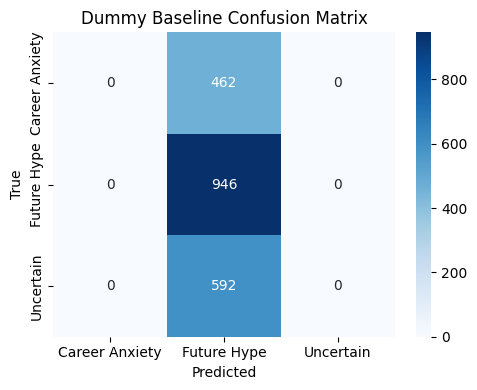

In [ ]:
# Recreate LABEL_MAP and INV_LABEL_MAP as they are needed by the evaluation functions
LABEL_MAP = {cls_name: i for i, cls_name in enumerate(le.classes_)}
INV_LABEL_MAP = {v: k for k, v in LABEL_MAP.items()}

dummy_pipe = Pipeline([
    ("tfidf", TfidfVectorizer(max_features=5000, ngram_range=(1,2))),
    ("clf", DummyClassifier(strategy="most_frequent", random_state=RANDOM_STATE))
])

y_pred_dummy = evaluate_classifier(
    "Dummy (Most Frequent Class)",
    dummy_pipe,
    X_train, y_train,
    X_test, y_test
)

plot_confusion(y_test, y_pred_dummy, "Dummy Baseline Confusion Matrix")

####Multinomial Naïve Bayes + TF-IDF


===== TF-IDF + Multinomial Naïve Bayes =====
                precision    recall  f1-score   support

Career Anxiety       0.91      0.13      0.23       462
   Future Hype       0.51      1.00      0.67       946
     Uncertain       0.70      0.09      0.17       592

      accuracy                           0.53      2000
     macro avg       0.71      0.41      0.36      2000
  weighted avg       0.66      0.53      0.42      2000



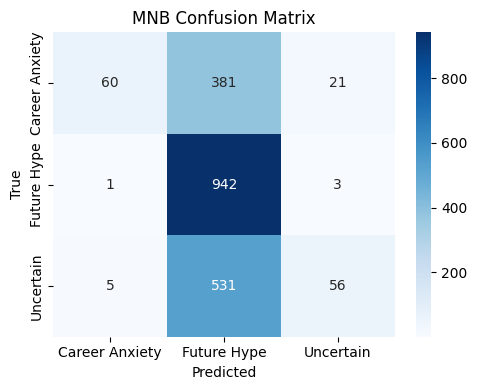

In [ ]:
mnb_pipe = Pipeline([
    ("tfidf", TfidfVectorizer(
        max_features=10000,
        ngram_range=(1,2),
        sublinear_tf=True
    )),
    ("clf", MultinomialNB())
])

y_pred_mnb = evaluate_classifier(
    "TF-IDF + Multinomial Naïve Bayes",
    mnb_pipe,
    X_train, y_train,
    X_test, y_test
)

plot_confusion(y_test, y_pred_mnb, "MNB Confusion Matrix")

####Logistic Regression + TF-IDF

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(



===== TF-IDF + Logistic Regression =====
                precision    recall  f1-score   support

Career Anxiety       0.70      0.65      0.68       462
   Future Hype       0.81      0.80      0.81       946
     Uncertain       0.64      0.68      0.66       592

      accuracy                           0.73      2000
     macro avg       0.72      0.71      0.71      2000
  weighted avg       0.73      0.73      0.73      2000



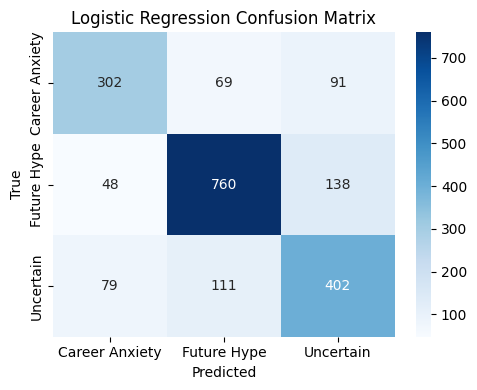

In [ ]:
logreg_pipe = Pipeline([
    ("tfidf", TfidfVectorizer(
        max_features=20000,
        ngram_range=(1,2),
        sublinear_tf=True
    )),
    ("clf", LogisticRegression(
        max_iter=1000,
        class_weight="balanced",
        multi_class="ovr",
        random_state=RANDOM_STATE
    ))
])

y_pred_logreg = evaluate_classifier(
    "TF-IDF + Logistic Regression",
    logreg_pipe,
    X_train, y_train,
    X_test, y_test
)

plot_confusion(y_test, y_pred_logreg, "Logistic Regression Confusion Matrix")

###Linear SVM

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(



===== TF-IDF + Logistic Regression =====
                precision    recall  f1-score   support

Career Anxiety       0.70      0.65      0.68       462
   Future Hype       0.81      0.80      0.81       946
     Uncertain       0.64      0.68      0.66       592

      accuracy                           0.73      2000
     macro avg       0.72      0.71      0.71      2000
  weighted avg       0.73      0.73      0.73      2000



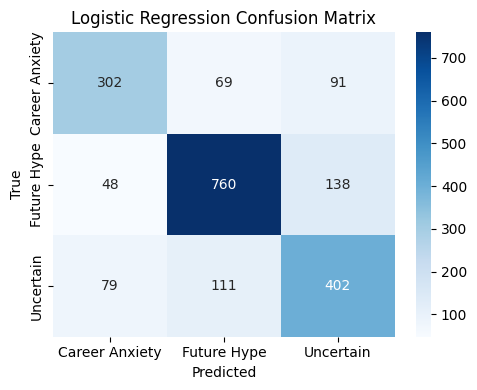

In [ ]:
logreg_pipe = Pipeline([
    ("tfidf", TfidfVectorizer(
        max_features=20000,
        ngram_range=(1,2),
        sublinear_tf=True
    )),
    ("clf", LogisticRegression(
        max_iter=1000,
        class_weight="balanced",
        multi_class="ovr",
        random_state=RANDOM_STATE
    ))
])

y_pred_logreg = evaluate_classifier(
    "TF-IDF + Logistic Regression",
    logreg_pipe,
    X_train, y_train,
    X_test, y_test
)

plot_confusion(y_test, y_pred_logreg, "Logistic Regression Confusion Matrix")

#CODE TO CREATE LINEAR SVM CONFUSION MATRIX

In [ ]:
#the following code has beem tested in the copy-version of this notebook...
#Import required libraries
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC

# Define classes manually to avoid dependency on df_cleaned
# Classes derived from LabelEncoder (alphabetical order)
class_names = ['Career Anxiety', 'Future Hype', 'Uncertain']
LABEL_MAP = {cls_name: i for i, cls_name in enumerate(class_names)}
INV_LABEL_MAP = {i: cls_name for i, cls_name in enumerate(class_names)}

RANDOM_STATE = 42

# Re-define the SVM pipeline from cell 3FiCBYeO31yr
svm_pipe = Pipeline([
    ("tfidf", TfidfVectorizer(
        max_features=20000,
        ngram_range=(1,2),
        sublinear_tf=True
    )),
    ("clf", LinearSVC(
        class_weight="balanced",
        random_state=RANDOM_STATE,
        max_iter=2000
    ))
])

# Fit the pipeline on the training data
# NOTE: X_train and y_train must be defined from previous cells
svm_pipe.fit(X_train, y_train)

# Step 1: Make predictions using the fitted pipeline
y_pred_svm = svm_pipe.predict(X_test)

# Step 2: Create confusion matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)

# Step 3: Define class labels for plotting
class_labels = [INV_LABEL_MAP[i] for i in sorted(INV_LABEL_MAP.keys())]

# Calculate accuracy dynamically
acc_svm = accuracy_score(y_test, y_pred_svm)

# Step 4: Create the visualization (PPT-optimized)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_svm,
            annot=True,           # Show numbers
            fmt='d',              # Integer format
            cmap='Blues',         # Professional color scheme
            xticklabels=class_labels,
            yticklabels=class_labels,
            cbar_kws={'label': 'Number of Samples'},
            linewidths=2,         # Thicker gridlines for clarity
            linecolor='white',    # White gridlines look cleaner
            annot_kws={'size': 14, 'weight': 'bold'},  # Larger numbers
            square=True)          # Square cells

# Titles and labels
plt.title(f'Linear SVM Confusion Matrix\nAccuracy: {acc_svm:.2%}',
          fontsize=16, fontweight='bold', pad=20)
plt.ylabel('Actual Emotion Category', fontsize=13, fontweight='bold')
plt.xlabel('Predicted Emotion Category', fontsize=13, fontweight='bold')
plt.xticks(rotation=45, ha='right', fontsize=11)
plt.yticks(rotation=0, fontsize=11)
plt.tight_layout()

# Save for PPT (high resolution)
plt.savefig('svm_confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

# Step 5: Print detailed metrics
print("\n" + "="*60)
print("LINEAR SVM CONFUSION MATRIX")
print("="*60)
print(cm_svm)
print(f"\nTotal Test Samples: {cm_svm.sum()}")
print("\n" + "="*60)
print("PER-CLASS PERFORMANCE")
print("="*60)
print(classification_report(y_test, y_pred_svm,
                            target_names=class_labels,
                            digits=4))


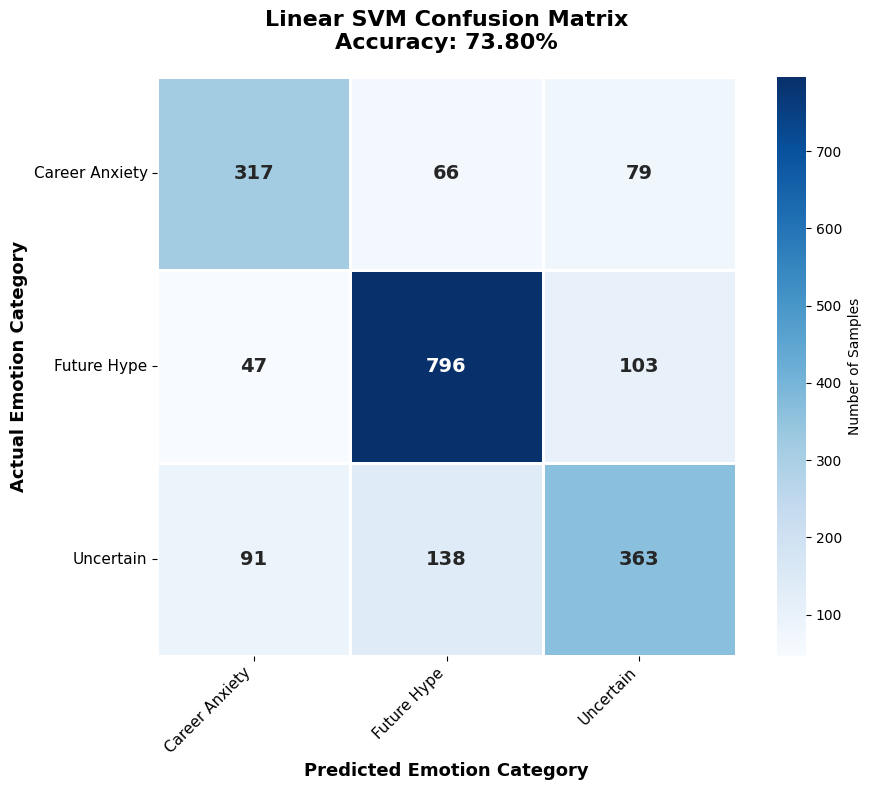
---



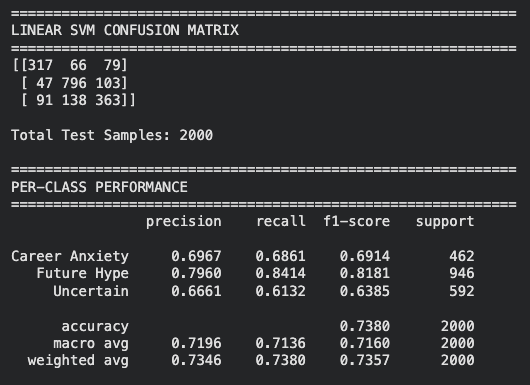

###Best Classification Model

In [ ]:
from sklearn.svm import LinearSVC

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)

# Define the SVM pipeline
svm_pipe = Pipeline([
    ("tfidf", TfidfVectorizer(
        max_features=20000,
        ngram_range=(1,2),
        sublinear_tf=True
    )),
    ("clf", LinearSVC(
        class_weight="balanced",
        random_state=RANDOM_STATE,
        max_iter=2000
    ))
])

cv_scores = cross_val_score(
    svm_pipe,
    X, # Use the full feature set
    y_encoded, # Use the encoded target variable
    cv=skf,
    scoring="f1_macro"
)

print("Linear SVM 5-fold macro-F1:",
      f"{cv_scores.mean():.3f} ± {cv_scores.std():.3f}")

Linear SVM 5-fold macro-F1: 0.725 ± 0.005


####DistilBERT Model

###Install and Imports

In [ ]:
!pip install -q transformers datasets accelerate

from transformers import AutoTokenizer, AutoModelForSequenceClassification, TrainingArguments, Trainer
from datasets import Dataset
import torch

In [ ]:
model_name = "distilbert-base-uncased"

tokenizer = AutoTokenizer.from_pretrained(model_name)

# Use the same numeric labels y (0,1,2)
train_df_bert = pd.DataFrame({
    "text": X_train,
    "label": y_train
})
test_df_bert = pd.DataFrame({
    "text": X_test,
    "label": y_test
})

train_ds = Dataset.from_pandas(train_df_bert)
test_ds = Dataset.from_pandas(test_df_bert)

def tokenize_batch(batch):
    return tokenizer(
        batch["text"],
        padding="max_length",
        truncation=True,
        max_length=256
    )

train_ds = train_ds.map(tokenize_batch, batched=True)
test_ds = test_ds.map(tokenize_batch, batched=True)

train_ds = train_ds.remove_columns(["text", "__index_level_0__"])
test_ds = test_ds.remove_columns(["text", "__index_level_0__"])

train_ds.set_format("torch")
test_ds.set_format("torch")

Map:   0%|          | 0/8000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [ ]:
model_name = "distilbert-base-uncased"

tokenizer = AutoTokenizer.from_pretrained(model_name)

# Use the same numeric labels y (0,1,2)
train_df_bert = pd.DataFrame({
    "text": X_train,
    "label": y_train
})
test_df_bert = pd.DataFrame({
    "text": X_test,
    "label": y_test
})

train_ds = Dataset.from_pandas(train_df_bert)
test_ds = Dataset.from_pandas(test_df_bert)

def tokenize_batch(batch):
    return tokenizer(
        batch["text"],
        padding="max_length",
        truncation=True,
        max_length=256
    )

train_ds = train_ds.map(tokenize_batch, batched=True)
test_ds = test_ds.map(tokenize_batch, batched=True)

train_ds = train_ds.remove_columns(["text", "__index_level_0__"])
test_ds = test_ds.remove_columns(["text", "__index_level_0__"])

train_ds.set_format("torch")
test_ds.set_format("torch")

Map:   0%|          | 0/8000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [ ]:
!pip install evaluate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 6.9 MB/s eta 0:00:00


In [ ]:
num_labels = len(LABEL_MAP)

model = AutoModelForSequenceClassification.from_pretrained(
    model_name,
    num_labels=num_labels
)

batch_size = 16

training_args = TrainingArguments(
    output_dir="./distilbert_ai_jobs",
    eval_strategy="epoch", # Changed from evaluation_strategy to eval_strategy
    save_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    num_train_epochs=3,
    weight_decay=0.01,
    load_best_model_at_end=True,
    metric_for_best_model="f1_macro",
    logging_steps=50
)

import evaluate
metric_acc = evaluate.load("accuracy")
metric_f1 = evaluate.load("f1")

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    preds = logits.argmax(axis=-1)
    acc = metric_acc.compute(predictions=preds, references=labels)["accuracy"]
    f1m = metric_f1.compute(predictions=preds, references=labels, average="macro")["f1"]
    return {"accuracy": acc, "f1_macro": f1m}

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_ds,
    eval_dataset=test_ds,
    compute_metrics=compute_metrics
)

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


/usr/local/lib/python3.12/dist-packages/notebook/notebookapp.py:191: SyntaxWarning: invalid escape sequence '\/'
  | |_| | '_ \/ _` / _` |  _/ -_)
wandb: (1) Create a W&B account
wandb: (2) Use an existing W&B account
wandb: (3) Don't visualize my results
wandb: Enter your choice:

 3


wandb: You chose "Don't visualize my results"


Epoch,Training Loss,Validation Loss,Accuracy,F1 Macro
1,0.602400,0.576995,0.775500,0.753703
2,0.378500,0.480131,0.817000,0.800357
3,0.280800,0.500118,0.823500,0.808644


{'eval_loss': 0.5001175999641418, 'eval_accuracy': 0.8235, 'eval_f1_macro': 0.8086440132931999, 'eval_runtime': 14.1852, 'eval_samples_per_second': 140.992, 'eval_steps_per_second': 8.812, 'epoch': 3.0}

=== DistilBERT Classification Report ===
                precision    recall  f1-score   support

Career Anxiety       0.79      0.84      0.81       462
   Future Hype       0.88      0.89      0.89       946
     Uncertain       0.76      0.70      0.73       592

      accuracy                           0.82      2000
     macro avg       0.81      0.81      0.81      2000
  weighted avg       0.82      0.82      0.82      2000



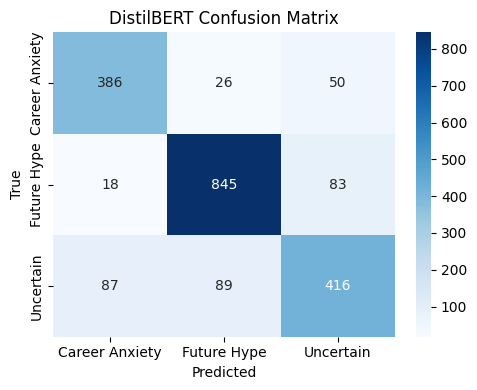

In [ ]:
trainer.train()

# Evaluate on test set
eval_metrics = trainer.evaluate()
print(eval_metrics)

# Get predictions
preds_output = trainer.predict(test_ds)
y_pred_bert = preds_output.predictions.argmax(axis=-1)

print("\n=== DistilBERT Classification Report ===")
print(classification_report(
    y_test,
    y_pred_bert,
    target_names=[k for k, _ in sorted(LABEL_MAP.items(), key=lambda x: x[1])]
))

plot_confusion(y_test, y_pred_bert, "DistilBERT Confusion Matrix")

Epoch,Training Loss,Validation Loss,Accuracy,F1 Macro
1,0.587900,0.549375,0.770500,0.747297
2,0.373800,0.477607,0.816500,0.799825
3,0.285500,0.497436,0.821000,0.804832


{'eval_loss': 0.49743565917015076, 'eval_accuracy': 0.821, 'eval_f1_macro': 0.8048316779065967, 'eval_runtime': 14.209, 'eval_samples_per_second': 140.756, 'eval_steps_per_second': 8.797, 'epoch': 3.0}

=== DistilBERT Classification Report ===
                precision    recall  f1-score   support

Career Anxiety       0.79      0.82      0.80       462
   Future Hype       0.88      0.90      0.89       946
     Uncertain       0.75      0.70      0.72       592

      accuracy                           0.82      2000
     macro avg       0.80      0.81      0.80      2000
  weighted avg       0.82      0.82      0.82      2000



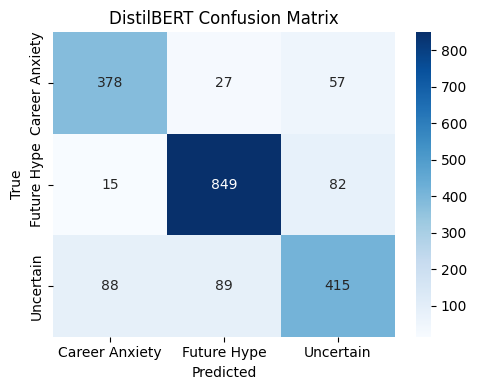

In [ ]:
trainer.train()

# Evaluate on test set
eval_metrics = trainer.evaluate()
print(eval_metrics)

# Get predictions
preds_output = trainer.predict(test_ds)
y_pred_bert = preds_output.predictions.argmax(axis=-1)

print("\n=== DistilBERT Classification Report ===")
print(classification_report(
    y_test,
    y_pred_bert,
    target_names=[k for k, _ in sorted(LABEL_MAP.items(), key=lambda x: x[1])]
))

plot_confusion(y_test, y_pred_bert, "DistilBERT Confusion Matrix")

####Task 2 – Sentiment Regression (Predict VADER Compound)

In [ ]:
y_reg = df_cleaned["NLTK_Compound"].values
X_text_reg = df_cleaned["Review_Cleaned"].astype(str).values

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_text_reg,
    y_reg,
    test_size=0.2,
    random_state=RANDOM_STATE
)

###TF-IDF + SVR

In [ ]:
reg_svr_pipe = Pipeline([
    ("tfidf", TfidfVectorizer(
        max_features=20000,
        ngram_range=(1,2),
        sublinear_tf=True
    )),
    ("svr", SVR(kernel="rbf", C=1.0, epsilon=0.1))
])

reg_svr_pipe.fit(X_train_reg, y_train_reg)
y_pred_svr = reg_svr_pipe.predict(X_test_reg)

mse = mean_squared_error(y_test_reg, y_pred_svr)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_reg, y_pred_svr)
r2 = r2_score(y_test_reg, y_pred_svr)

print("SVR Regression — RMSE:", round(rmse, 4),
      "MAE:", round(mae, 4),
      "R²:", round(r2, 4))

SVR Regression — RMSE: 0.3325 MAE: 0.2582 R²: 0.552


####Analysis: The TF-IDF + Support Vector Regressor (SVR) model has been evaluated for predicting the VADER compound sentiment scores. Here's what the metrics tell us:
RMSE (Root Mean Squared Error): 0.3325
RMSE measures the average magnitude of the errors. It indicates how concentrated the data is around the line of best fit. A value of 0.3325 means that, on average, the model's predictions for the compound sentiment score are off by about 0.3325 units from the actual scores. The VADER compound score typically ranges from -1 (most negative) to +1 (most positive), so an RMSE of 0.3325 suggests a moderate level of error relative to this range.
MAE (Mean Absolute Error): 0.2582
MAE measures the average magnitude of the errors, similar to RMSE, but it gives an equal weight to all errors, whereas RMSE gives more weight to larger errors. An MAE of 0.2582 indicates that the average absolute difference between the predicted and actual sentiment scores is approximately 0.2582. This is slightly lower than RMSE, which is expected as RMSE penalizes larger errors more heavily.
R² (Coefficient of Determination): 0.552
The R² score represents the proportion of the variance in the dependent variable (VADER compound score) that is predictable from the independent variables (TF-IDF features). An R² of 0.552 means that approximately 55.2% of the variation in the sentiment scores can be explained by our model. An R² value of 1.0 indicates a perfect fit, while 0.0 indicates that the model explains none of the variability of the response data around its mean. Therefore, an R² of 0.552 suggests that the model has some predictive power, explaining more than half of the variance, but there's still a significant portion of the variance (around 44.8%) that is not captured by the model.
In summary, the SVR model demonstrates a reasonable ability to predict the VADER compound sentiment scores, explaining over half of the variance. The average prediction error is around 0.25-0.33 units on a scale of -1 to 1. This could be considered a fair performance for a sentiment regression task, but there is still room for improvement.

##TF-IDF + Randome Forest Regressor

In [ ]:
rf_reg_pipe = Pipeline([
    ("tfidf", TfidfVectorizer(
        max_features=20000,
        ngram_range=(1,2),
        sublinear_tf=True
    )),
    ("rf", RandomForestRegressor(
        n_estimators=200,
        random_state=RANDOM_STATE,
        n_jobs=-1
    ))
])

rf_reg_pipe.fit(X_train_reg, y_train_reg)
y_pred_rf = rf_reg_pipe.predict(X_test_reg)

mse_rf = mean_squared_error(y_test_reg, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
mae_rf = mean_absolute_error(y_test_reg, y_pred_rf)
r2_rf = r2_score(y_test_reg, y_pred_rf)

print("Random Forest Regression — RMSE:", round(rmse_rf, 4),
      "MAE:", round(mae_rf, 4),
      "R²:", round(r2_rf, 4))

Random Forest Regression — RMSE: 0.363 MAE: 0.2496 R²: 0.4662


In [ ]:
pd.DataFrame(results).sort_values("f1_macro", ascending=False)

,model,accuracy,f1_macro,precision_macro,recall_macro
4,TF-IDF + Logistic Regression,0.732,0.713743,0.716519,0.712039
3,TF-IDF + Logistic Regression,0.732,0.713743,0.716519,0.712039
2,TF-IDF + Multinomial Naïve Bayes,0.529,0.355599,0.705727,0.406745
0,Dummy (Most Frequent Class),0.473,0.214076,0.157667,0.333333
1,Dummy (Most Frequent Class),0.473,0.214076,0.157667,0.333333
